# Depression And Social Media

In [1]:
import numpy as np
import pandas as pd
import praw
import time
from datetime import datetime
# Following libraries are used for Data Analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import string
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy import stats

## Part 1 · Data Collection

### Step 1 · Collect data about depression from the "dreaddit" dataset downloaded from the *Kaggle* as the main dataset (dataset_1)

In [2]:
## read data from two CSV files
df_raw_dreaddit_train = pd.read_csv("dreaddit-train.csv")
df_raw_dreaddit_test = pd.read_csv("dreaddit-test.csv")

In [3]:
## check basic information about these two datasets
# 1. generate descriptive statistics
df_raw_dreaddit_train.describe(include='all')

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838,2838,2838,2838,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
unique,10,2343,173,2820,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ptsd,7o5n2d,"(0, 5)",#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,584,6,337,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,NaN,NaN,NaN,NaN,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,NaN,NaN,NaN,NaN,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,NaN,NaN,NaN,NaN,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,NaN,NaN,NaN,NaN,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,NaN,NaN,NaN,NaN,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667


In [4]:
df_raw_dreaddit_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 116 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    subreddit                 object 
 1    post_id                   object 
 2    sentence_range            object 
 3    text                      object 
 4    id                        int64  
 5    label                     int64  
 6    confidence                float64
 7    social_timestamp          int64  
 8    social_karma              int64  
 9    syntax_ari                float64
 10   lex_liwc_WC               int64  
 11   lex_liwc_Analytic         float64
 12   lex_liwc_Clout            float64
 13   lex_liwc_Authentic        float64
 14   lex_liwc_Tone             float64
 15   lex_liwc_WPS              float64
 16   lex_liwc_Sixltr           float64
 17   lex_liwc_Dic              float64
 18   lex_liwc_function         float64
 19   lex_liwc_pronoun          float64
 20   lex_li

In [5]:
df_raw_dreaddit_test.describe(include='all')

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715,715,715,715,715.000000,715.000000,7.150000e+02,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
unique,NaN,10,586,111,715,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,anxiety,8c6fwz,"[0, 5]",How can I keep us protected? They have already...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,147,6,97,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13861.372028,NaN,NaN,NaN,NaN,0.516084,0.717895,1.517570e+09,24.627972,4.705624,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,NaN,NaN,NaN,NaN,0.500091,0.325688,1.553944e+07,113.086473,3.244652,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,NaN,NaN,NaN,NaN,0.000000,0.600000,1.509572e+09,2.000000,2.584422,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,NaN,NaN,NaN,NaN,1.000000,0.800000,1.516658e+09,5.000000,4.477286,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.531001e+09,10.000000,6.723889,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701


In [6]:
df_raw_dreaddit_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 116 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    subreddit                 object 
 2    post_id                   object 
 3    sentence_range            object 
 4    text                      object 
 5    label                     int64  
 6    confidence                float64
 7    social_timestamp          float64
 8    social_karma              int64  
 9    syntax_ari                float64
 10   lex_liwc_WC               int64  
 11   lex_liwc_Analytic         float64
 12   lex_liwc_Clout            float64
 13   lex_liwc_Authentic        float64
 14   lex_liwc_Tone             float64
 15   lex_liwc_WPS              float64
 16   lex_liwc_Sixltr           float64
 17   lex_liwc_Dic              float64
 18   lex_liwc_function         float64
 19   lex_liwc_pronoun          float64
 20   lex_liwc

**References:**
- [isin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html#pandas.DataFrame.isin)

In [7]:
# 2. check first five rows
df_raw_dreaddit_train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [8]:
df_raw_dreaddit_test.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [9]:
## select the rows (post data) posted in the subreddit "anxiety" or "stress"
# 1. for the original training dataset from 'dreaddit'
df_train = df_raw_dreaddit_train.loc[df_raw_dreaddit_train['subreddit'].isin(['anxiety', 'stress']), ['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'social_timestamp', 'sentiment']]
df_train

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
7,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1483582174,-0.079630
10,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1529630854,0.008571
11,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1522177346,0.016850
12,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1532289383,0.055000
14,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1542188956,-0.534375
...,...,...,...,...,...,...,...,...
2818,828,anxiety,86efsk,She has not once shown disappointment. When sh...,1,1.000000,1521747982,-0.212500
2819,1450,anxiety,8y522q,"This SUCKS, we're booking plane tickets next W...",1,1.000000,1531355642,0.034821
2821,5563,anxiety,99uoqb,**I don't want to be anxious in drawing class....,1,1.000000,1535087583,0.183333
2831,1341,anxiety,5s3m9z,"Hey, So I come from a middle class family and ...",1,0.800000,1486246624,-0.050000


In [10]:
# 2. for the original testing dataset from 'dreaddit'
df_test = df_raw_dreaddit_test.loc[df_raw_dreaddit_test['subreddit'].isin(['anxiety', 'stress']), ['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'social_timestamp', 'sentiment']]
df_test

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
1,19059,anxiety,680i6d,I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,-0.065909
7,39090,anxiety,71ma4y,"More specifically, for example, I live with ro...",1,0.8,1.506028e+09,0.039977
17,745,anxiety,6f4swf,"I have a lot of self esteem. I value myself, I...",1,0.6,1.496540e+09,0.335714
18,895,anxiety,6f4swf,"If I go to an interview for example, I'll know...",0,0.6,1.496540e+09,0.189815
19,1361,anxiety,8dllx7,Like sleep would never be a simple thing for m...,0,0.0,1.524207e+09,0.150000
...,...,...,...,...,...,...,...,...
686,567,anxiety,8gxoqh,"I don't know why this happened, but I use to h...",1,1.0,1.525422e+09,0.098148
690,527,anxiety,9i810q,aaaa sorry I feel so dumb for messing up like ...,1,0.5,1.537706e+09,-0.267857
691,1072,anxiety,9kajk3,All I have from them is a roof over a head and...,1,1.0,1.538346e+09,-0.250000
697,290,anxiety,9wve2b,"Save yourselves, and get a doggo if you can. *...",0,1.0,1.542159e+09,0.234524


In [11]:
## select the rows (post data) posted not in the subreddit "anxiety" or "stress", aiming at selecting posts containing and related to 'depression' to fill the datasets
# 1. for the original training dataset from 'dreaddit'
df_remaining_train = df_raw_dreaddit_train.loc[~df_raw_dreaddit_train['subreddit'].isin(['anxiety', 'stress']), ['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'social_timestamp', 'sentiment']]
df_remaining_train

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
0,33181,ptsd,8601tu,"He said he had not felt that way before, sugge...",1,0.800000,1521614353,-0.002742
1,2606,assistance,8lbrx9,"Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,0.292857
2,38816,ptsd,9ch1zh,My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,0.011894
3,239,relationships,7rorpp,"until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,0.141671
4,1421,survivorsofabuse,9p2gbc,October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,-0.204167
...,...,...,...,...,...,...,...,...
2832,20394,relationships,7s05hb,But then I'll get there and he'll drop the bom...,1,0.600000,1516565451,0.075824
2833,1713,relationships,7oee1t,"* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,0.552066
2834,1133,ptsd,9p4ung,I don't have the ability to cope with it anymo...,1,1.000000,1539827412,-0.220370
2836,1834,almosthomeless,5y53ya,Do you find this normal? They have a good rela...,0,0.571429,1488938143,0.159722


In [12]:
# 2. for the original testing dataset from 'dreaddit'
df_remaining_test = df_raw_dreaddit_test.loc[~df_raw_dreaddit_test['subreddit'].isin(['anxiety', 'stress']), ['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'social_timestamp', 'sentiment']]
df_remaining_test

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
0,896,relationships,7nu7as,"Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,0.000000
2,7977,ptsd,8eeu1t,We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,-0.036818
3,1214,ptsd,8d28vu,"My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,-0.066667
4,1965,relationships,7r1e85,I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,0.141667
5,850,assistance,7py440,Thanks. Edit 1 - Fuel Receipt As Requested. <u...,0,1.000000,1.515778e+09,-0.275000
...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,-0.075000
711,2212,relationships,7oeyuc,Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0.189286
712,27951,relationships,7ssxec,"Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,-0.044444
713,1164,assistance,90bila,Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,0.090000


In [13]:
## merge these two remaining datasets
df_remaining = pd.concat([df_remaining_train, df_remaining_test], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
df_remaining

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
0,33181,ptsd,8601tu,"He said he had not felt that way before, sugge...",1,0.800000,1.521614e+09,-0.002742
1,2606,assistance,8lbrx9,"Hey there r/assistance, Not sure if this is th...",0,1.000000,1.527010e+09,0.292857
2,38816,ptsd,9ch1zh,My mom then hit me with the newspaper and it s...,1,0.800000,1.535936e+09,0.011894
3,239,relationships,7rorpp,"until i met my new boyfriend, he is amazing, h...",1,0.600000,1.516430e+09,0.141671
4,1421,survivorsofabuse,9p2gbc,October is Domestic Violence Awareness Month a...,1,0.800000,1.539809e+09,-0.204167
...,...,...,...,...,...,...,...,...
2820,24271,ptsd,7vavh4,i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,-0.075000
2821,2212,relationships,7oeyuc,Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0.189286
2822,27951,relationships,7ssxec,"Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,-0.044444
2823,1164,assistance,90bila,Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,0.090000


- [contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html#pandas.Series.str.contains)

In [14]:
## select posts whose contents contain several keywords from the remaining dataset 
## keywords include: "depression", "depressed", "hopeless", "hopelessness", "sadness", "sad", "helpless", "helplessness", "disappoint", "disappointed", "disappointment"
keywords = ["depression", "depressed", "hopeless", "hopelessness", "sadness", "sad", "helpless", "helplessness", "disappoint", "disappointed", "disappointment"]
df_remaining_depression = df_remaining[df_remaining['text'].str.contains('|'.join(keywords))]
df_remaining_depression

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
27,1486,relationships,7sg6pl,But it's been 2 monthsalready this time. We di...,1,0.800000,1.516730e+09,-0.112642
42,1687,ptsd,7hzoqz,During the pregnancy and after the (traumatic)...,0,0.800000,1.512582e+09,0.126407
50,2026,survivorsofabuse,8fseme,But she says she can't stand hearing it becaus...,1,0.571429,1.525019e+09,-0.080208
68,1243,assistance,83xi5f,Hi I just wondered if any of you could offer s...,0,0.600000,1.520881e+09,0.012500
71,967,domesticviolence,6or8tl,Sorry for such a jumbled mess of a post. Edit:...,1,0.800000,1.500675e+09,-0.375000
...,...,...,...,...,...,...,...,...
2777,205,ptsd,9ldmy1,"My car broke. Again massive stress, helplessne...",1,1.000000,1.538672e+09,-0.133333
2797,531,survivorsofabuse,68vctn,I've mostly come to terms with it but every ti...,1,1.000000,1.493754e+09,0.134259
2798,22731,ptsd,9ovois,I’m going to be posting something similar in t...,1,0.666667,1.539753e+09,0.052857
2800,1007,relationships,7oltzb,He told me to never talk to him again and that...,0,0.000000,1.515272e+09,0.000000


In [15]:
## merge three datasets into one dataset for data preprocessing
# 1. merge 'df_train' and 'df_test' into one dataframe
df_1 = pd.concat([df_train, df_test], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
df_1

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,-0.534375
...,...,...,...,...,...,...,...,...
723,567,anxiety,8gxoqh,"I don't know why this happened, but I use to h...",1,1.000000,1.525422e+09,0.098148
724,527,anxiety,9i810q,aaaa sorry I feel so dumb for messing up like ...,1,0.500000,1.537706e+09,-0.267857
725,1072,anxiety,9kajk3,All I have from them is a roof over a head and...,1,1.000000,1.538346e+09,-0.250000
726,290,anxiety,9wve2b,"Save yourselves, and get a doggo if you can. *...",0,1.000000,1.542159e+09,0.234524


In [16]:
# 2. merge 'df_1' and 'df_remaining_depression' into one dataframe
dataset_1 = pd.concat([df_1, df_remaining_depression], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
dataset_1

,id,subreddit,post_id,text,label,confidence,social_timestamp,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,-0.534375
...,...,...,...,...,...,...,...,...
908,205,ptsd,9ldmy1,"My car broke. Again massive stress, helplessne...",1,1.000000,1.538672e+09,-0.133333
909,531,survivorsofabuse,68vctn,I've mostly come to terms with it but every ti...,1,1.000000,1.493754e+09,0.134259
910,22731,ptsd,9ovois,I’m going to be posting something similar in t...,1,0.666667,1.539753e+09,0.052857
911,1007,relationships,7oltzb,He told me to never talk to him again and that...,0,0.000000,1.515272e+09,0.000000


In [17]:
# 3. rename the 'social_timestamp'
mapping = {
    'id': 'id',
    'subreddit': 'subreddit',
    'post_id': 'post_id',
    'text': 'text',
    'label': 'label',
    'confidence': 'confidence',
    'social_timestamp': 'created_utc',
    'sentiment': 'sentiment'
}
dataset_1 = dataset_1.rename(columns=mapping)
dataset_1

,id,subreddit,post_id,text,label,confidence,created_utc,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,-0.534375
...,...,...,...,...,...,...,...,...
908,205,ptsd,9ldmy1,"My car broke. Again massive stress, helplessne...",1,1.000000,1.538672e+09,-0.133333
909,531,survivorsofabuse,68vctn,I've mostly come to terms with it but every ti...,1,1.000000,1.493754e+09,0.134259
910,22731,ptsd,9ovois,I’m going to be posting something similar in t...,1,0.666667,1.539753e+09,0.052857
911,1007,relationships,7oltzb,He told me to never talk to him again and that...,0,0.000000,1.515272e+09,0.000000


In [18]:
# 4. check basic information about the 'dataset_1'
dataset_1.describe(include='all')

,id,subreddit,post_id,text,label,confidence,created_utc,sentiment
count,913.000000,913,913,913,913.000000,913.000000,9.130000e+02,913.000000
unique,NaN,10,803,912,NaN,NaN,NaN,NaN
top,NaN,anxiety,9u626u,"Hello, You are invited to complete a survey fo...",NaN,NaN,NaN,NaN
freq,NaN,650,5,2,NaN,NaN,NaN,NaN
mean,13441.748083,NaN,NaN,NaN,0.640745,0.819001,1.517592e+09,0.020288
std,16980.125010,NaN,NaN,NaN,0.480045,0.218472,1.755290e+07,0.190761
min,2.000000,NaN,NaN,NaN,0.000000,0.000000,1.483296e+09,-1.000000
25%,960.000000,NaN,NaN,NaN,0.000000,0.600000,1.503411e+09,-0.079167
50%,1795.000000,NaN,NaN,NaN,1.000000,0.833333,1.519288e+09,0.020000
75%,24110.000000,NaN,NaN,NaN,1.000000,1.000000,1.533050e+09,0.142222


In [19]:
# 4. save the final dataset as 'dataset_1'
dataset_1.to_csv('dataset-1.csv', index=False)

### Step 2 · Collect data about depression from the "twitter" dataset downloaded from the *Figshare* as the auxiliary dataset and then merge it with the main dataset (dataset_1)

In [20]:
## read data from the CSV file
df_raw_twitter = pd.read_csv("twitter.csv")

In [21]:
## check basic information about the dataset
# 1. generate descriptive statistics
df_raw_twitter.describe(include='all')

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
count,3.082000e+03,3.082000e+03,3.082000e+03,3082,3082.0,0.0,3075,3082,3082,3082,...,0.0,0.0,0.0,0.0,0.0,3082,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,3082,NaN,NaN,3011,9,13,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2019-09-29 15:00:52,NaN,NaN,it suck do not it feel like you be not good en...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,4,3059,3067,3082,...,NaN,NaN,NaN,NaN,NaN,3082,NaN,NaN,NaN,NaN
mean,9.176925e+17,9.176925e+17,1.507630e+12,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.668862e+17,3.668862e+17,8.747249e+10,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.002418e+17,3.002418e+17,1.360418e+12,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.725266e+17,6.725266e+17,1.449178e+12,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.975784e+17,8.975784e+17,1.502834e+12,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.269792e+18,1.269792e+18,1.591577e+12,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# 2. check first five rows
df_raw_twitter.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1261623711502753792,1261623711502753792,1.589630e+12,2020-05-16 01:45:07,-1000,NaN,the real reason why you be sad you be attach t...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1255537912491343872,1255537912491343872,1.588179e+12,2020-04-29 06:42:19,-1000,NaN,my biggest problem be overthinking everything,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1255524270521761792,1255524270521761792,1.588175e+12,2020-04-29 05:48:07,-1000,NaN,the worst sadness be the sadness you have teac...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1255524059334365186,1255524059334365186,1.588175e+12,2020-04-29 05:47:16,-1000,NaN,i cannot make you understand i cannot make any...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1172463022100512769,1172463022100512769,1.568372e+12,2019-09-13 00:52:22,-1000,NaN,i do not think anyone really understand how ti...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [23]:
## get the raw dataset
# 1. select specific columns (features)
df_twitter = df_raw_twitter[['id', 'conversation_id', 'tweet', 'created_at', 'date']]
df_twitter

,id,conversation_id,tweet,created_at,date
0,1261623711502753792,1261623711502753792,the real reason why you be sad you be attach t...,1.589630e+12,2020-05-16 01:45:07
1,1255537912491343872,1255537912491343872,my biggest problem be overthinking everything,1.588179e+12,2020-04-29 06:42:19
2,1255524270521761792,1255524270521761792,the worst sadness be the sadness you have teac...,1.588175e+12,2020-04-29 05:48:07
3,1255524059334365186,1255524059334365186,i cannot make you understand i cannot make any...,1.588175e+12,2020-04-29 05:47:16
4,1172463022100512769,1172463022100512769,i do not think anyone really understand how ti...,1.568372e+12,2019-09-13 00:52:22
...,...,...,...,...,...
3077,1181274399019651072,1181274399019651072,cough sneeze be tho worst,1.570473e+12,2019-10-07 08:25:38
3078,1181029457999450114,1181029457999450114,i can be your sad whore ahaha,1.570414e+12,2019-10-06 16:12:19
3079,1180747827359539200,1180747827359539200,bro that feel you get after you sneeze,1.570347e+12,2019-10-05 21:33:13
3080,1178886862665965568,1178886862665965568,long piss be the best,1.569904e+12,2019-09-30 18:18:25


In [24]:
# 2. add a column 'label' with all rows value 1 according to the description of the raw dataset
df_twitter['label'] = 1
df_twitter

C:\Users\Morri\AppData\Local\Temp\ipykernel_11576\1193074350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter['label'] = 1


,id,conversation_id,tweet,created_at,date,label
0,1261623711502753792,1261623711502753792,the real reason why you be sad you be attach t...,1.589630e+12,2020-05-16 01:45:07,1
1,1255537912491343872,1255537912491343872,my biggest problem be overthinking everything,1.588179e+12,2020-04-29 06:42:19,1
2,1255524270521761792,1255524270521761792,the worst sadness be the sadness you have teac...,1.588175e+12,2020-04-29 05:48:07,1
3,1255524059334365186,1255524059334365186,i cannot make you understand i cannot make any...,1.588175e+12,2020-04-29 05:47:16,1
4,1172463022100512769,1172463022100512769,i do not think anyone really understand how ti...,1.568372e+12,2019-09-13 00:52:22,1
...,...,...,...,...,...,...
3077,1181274399019651072,1181274399019651072,cough sneeze be tho worst,1.570473e+12,2019-10-07 08:25:38,1
3078,1181029457999450114,1181029457999450114,i can be your sad whore ahaha,1.570414e+12,2019-10-06 16:12:19,1
3079,1180747827359539200,1180747827359539200,bro that feel you get after you sneeze,1.570347e+12,2019-10-05 21:33:13,1
3080,1178886862665965568,1178886862665965568,long piss be the best,1.569904e+12,2019-09-30 18:18:25,1


**Reference**:
- [rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename)

In [25]:
# 3. rename all features
mapping = {
    'id': 'id',
    'conversation_id': 'post_id',
    'tweet': 'text',
    'created_at': 'created_utc',
    'date': 'date', 
    'label': 'label'
}
df_twitter = df_twitter.rename(columns=mapping)
df_twitter

,id,post_id,text,created_utc,date,label
0,1261623711502753792,1261623711502753792,the real reason why you be sad you be attach t...,1.589630e+12,2020-05-16 01:45:07,1
1,1255537912491343872,1255537912491343872,my biggest problem be overthinking everything,1.588179e+12,2020-04-29 06:42:19,1
2,1255524270521761792,1255524270521761792,the worst sadness be the sadness you have teac...,1.588175e+12,2020-04-29 05:48:07,1
3,1255524059334365186,1255524059334365186,i cannot make you understand i cannot make any...,1.588175e+12,2020-04-29 05:47:16,1
4,1172463022100512769,1172463022100512769,i do not think anyone really understand how ti...,1.568372e+12,2019-09-13 00:52:22,1
...,...,...,...,...,...,...
3077,1181274399019651072,1181274399019651072,cough sneeze be tho worst,1.570473e+12,2019-10-07 08:25:38,1
3078,1181029457999450114,1181029457999450114,i can be your sad whore ahaha,1.570414e+12,2019-10-06 16:12:19,1
3079,1180747827359539200,1180747827359539200,bro that feel you get after you sneeze,1.570347e+12,2019-10-05 21:33:13,1
3080,1178886862665965568,1178886862665965568,long piss be the best,1.569904e+12,2019-09-30 18:18:25,1


In [26]:
# 4. rearrange the order of features
df_twitter = df_twitter[['id', 'post_id', 'text', 'label', 'created_utc', 'date']]
df_twitter

,id,post_id,text,label,created_utc,date
0,1261623711502753792,1261623711502753792,the real reason why you be sad you be attach t...,1,1.589630e+12,2020-05-16 01:45:07
1,1255537912491343872,1255537912491343872,my biggest problem be overthinking everything,1,1.588179e+12,2020-04-29 06:42:19
2,1255524270521761792,1255524270521761792,the worst sadness be the sadness you have teac...,1,1.588175e+12,2020-04-29 05:48:07
3,1255524059334365186,1255524059334365186,i cannot make you understand i cannot make any...,1,1.588175e+12,2020-04-29 05:47:16
4,1172463022100512769,1172463022100512769,i do not think anyone really understand how ti...,1,1.568372e+12,2019-09-13 00:52:22
...,...,...,...,...,...,...
3077,1181274399019651072,1181274399019651072,cough sneeze be tho worst,1,1.570473e+12,2019-10-07 08:25:38
3078,1181029457999450114,1181029457999450114,i can be your sad whore ahaha,1,1.570414e+12,2019-10-06 16:12:19
3079,1180747827359539200,1180747827359539200,bro that feel you get after you sneeze,1,1.570347e+12,2019-10-05 21:33:13
3080,1178886862665965568,1178886862665965568,long piss be the best,1,1.569904e+12,2019-09-30 18:18:25


In [27]:
## select posts whose contents contain several keywords from the remaining dataset 
## keywords include: "depression", "depressed", "hopeless", "hopelessness", "sadness", "sad", "helpless", "helplessness", "disappoint", "disappointed", "disappointment"
keywords = ["depression", "depressed", "hopeless", "hopelessness", "sadness", "sad", "helpless", "helplessness", "disappoint", "disappointed", "disappointment"]
df_twitter_depression = df_twitter[df_twitter['text'].str.contains('|'.join(keywords), na=False)] # using na=True to handle 'NaN'
df_twitter_depression

,id,post_id,text,label,created_utc,date
0,1261623711502753792,1261623711502753792,the real reason why you be sad you be attach t...,1,1.589630e+12,2020-05-16 01:45:07
2,1255524270521761792,1255524270521761792,the worst sadness be the sadness you have teac...,1,1.588175e+12,2020-04-29 05:48:07
8,1168561823852818432,1168561823852818432,i be disappoint in myself because i know i be ...,1,1.567442e+12,2019-09-02 06:30:24
12,1013600494936178689,1013600494936178689,live with depression and anxiety no motivation...,1,1.530496e+12,2018-07-01 15:49:24
21,890555623158431748,890555623158431748,i hate get so sad to the point where my body c...,1,1.501160e+12,2017-07-27 02:53:00
...,...,...,...,...,...,...
2859,1332029489530900481,1332029489530900481,sad today,1,1.606416e+12,2020-11-26 08:32:32
2970,1396945257015562243,1396945257015562243,achievement unlock even more depression,1,1.621893e+12,2021-05-24 11:44:37
2977,1384572514374852616,1384572514374852616,i finally figure it outbakersfield be what giv...,1,1.618943e+12,2021-04-20 08:19:46
2983,1371712165225238533,1371712165225238533,sometimes people with depressionanxiety can be...,1,1.615877e+12,2021-03-15 20:37:20


**References**:
- [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

In [28]:
## merge this dataset with dataset_1 for data preprocessing
dataset_2 = pd.concat([dataset_1, df_twitter_depression], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
dataset_2

,id,subreddit,post_id,text,label,confidence,created_utc,sentiment,date
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,-0.079630,NaN
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,0.008571,NaN
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,0.016850,NaN
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,0.055000,NaN
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,-0.534375,NaN
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,NaN,2020-11-26 08:32:32
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,NaN,2021-05-24 11:44:37
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,NaN,2021-04-20 08:19:46
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,NaN,2021-03-15 20:37:20


In [29]:
## rearrange the order of features
main_dataset = dataset_2[['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'created_utc', 'date', 'sentiment']]
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaN,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaN,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaN,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaN,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaN,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,2021-03-15 20:37:20,NaN


In [30]:
## convert the date into datetime type
main_dataset['date'] = pd.to_datetime(main_dataset['date'])

In [31]:
## save the final main dataset into a CSV file
main_dataset.to_csv('main-dataset.csv', index=False)

In [32]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1032 non-null   int64         
 1   subreddit    913 non-null    object        
 2   post_id      1032 non-null   object        
 3   text         1032 non-null   object        
 4   label        1032 non-null   int64         
 5   confidence   913 non-null    float64       
 6   created_utc  1032 non-null   float64       
 7   date         119 non-null    datetime64[ns]
 8   sentiment    913 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 72.7+ KB


### Step 3 · Collect data about depression from *Reddit* using PRAW API

In [33]:
## Configuration for PRAW
reddit = praw.Reddit(
    client_id="gOxImWE64i1kd4qjZtsUGA",
    client_secret="dQ0PfogVu7r75MOSo1tOeYMjBk8y_A",
    password="", # my account has no password, so this field is empty
    user_agent="python:depression:v0.0.1 (by /u/Efficient_Draw_2434)",
    username="u/Efficient_Draw_2434",
)

**References:**
- [submission](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html)
- [comments](https://praw.readthedocs.io/en/stable/code_overview/models/comment.html)
- methods of subreddit
  1. hot
  2. new
  3. top
  4. rising
  5. controversial
  6. gilded

In [34]:
## Get 100 submissions and their related comments and replies about the topic of 'depression'
# 1. initialisation
subreddit = reddit.subreddit("depression") # subreddit about depression
subs = [] # store submissions related to 'depression'
coms = [] # store comments related to 'depression'
reps = [] # store replies related to 'depression'
num_sub = 0 # collected number of submissions
num_com = 0 # collected number of comments
num_rep = 0 # collected number of replies
start_time = time.perf_counter() # record consuming time

# 2. get submissions
flag_comment = False
flag_reply = False
hot_list = subreddit.hot(limit=100) # method of subreddit: hot
if hot_list:
    print("There exist submissions.")
    for submission in hot_list:
        # select unremoved non-stickied submissions that are not related to the rules of this subreddit
        if not submission.stickied and submission.selftext not in ["[removed]", "[deleted]"] and submission:
            num_sub += 1
            # contruct a dict to store the data
            submission_info = {
                'id': submission.id,
                'subreddit': 'depression',
                'post_id': submission.id,
                # 'name': submission.name, # fullname of the submission
                # 'title': submission.title, # title of the submission
                'text': submission.selftext, # content of the submission
                # 'num_comments': submission.num_comments, # number of comments in this submission
                # 'score': submission.score, # the number of upvotes for the submission
                'created_utc': submission.created_utc, # created time
                # 'upvote_ratio': submission.upvote_ratio, # the percentage of upvotes from all votes on the submission
                # 'author_id': None, # info about the author of this comment
                # 'author_username': None, # info about the author of this comment
                # 'author_descriptions': None # info about the author of this comment
            }
            # # get info about the author of this submission
            # if submission.author:
            #     if submission.author.name not in ["[removed]", "[deleted]"]:
            #         # if not submission.author.is_suspended:
            #         #     submission_info['author_id'] = submission.author.id
            #         submission_info['author_username'] = submission.author.name
            #         # check whether this author has subreddits
            #         # if submission.author.subreddit and hasattr(submission.author, "subreddit"):
            #         #     submission_info['author_descriptions'] = submission.author.subreddit.public_description
            # append the submission
            subs.append(submission_info)
        
            # 3. get comments
            submission.comments.replace_more(limit=None) # get all comments
            com_list = submission.comments
            if com_list:
                flag_comment = True
                for comment in com_list:
                    # select unremoved comments
                    if comment and comment.body and comment.body not in ["[removed]", "[deleted]"]:
                        num_com += 1
                        # contruct a dict to store the data
                        comment_info = {
                            'id': comment.id,
                            'subreddit': 'depression',
                            'post_id': comment.id,
                            # 'submission_id': None, # id of the submission this comment belongs to
                            # 'submission_title': None, # title of the submission this comment belongs to
                            'text': comment.body, # content of the comment
                            # 'link_id': comment.link_id, # the submission ID that the comment belongs to
                            # 'score': comment.score, # the number of upvotes for the comment
                            'created_utc': comment.created_utc, # created time
                            # 'author_id': None, # info about the author of this comment
                            # 'author_username': None, # info about the author of this comment
                            # 'author_descriptions': None # info about the author of this comment
                        }
                        # # get info about the submission this comment belongs to
                        # if comment.submission:
                        #     # comment_info['submission_id'] = comment.submission.id
                        #     comment_info['submission_title'] = comment.submission.title
                        # # get info about the author of this comment
                        # if comment.author:
                        #     if comment.author.name not in ["[removed]", "[deleted]"]:
                        #         # if not comment.author.is_suspended:
                        #         #     comment_info['author_id'] = comment.author.id
                        #         comment_info['author_username'] = comment.author.name
                        #         # check whether this author has subreddits
                        #         # if comment.author.subreddit and hasattr(comment.author, "subreddit"):
                        #         #     comment_info['author_descriptions'] = comment.author.subreddit.public_description
                        # append the comment
                        coms.append(comment_info)
        
                        # 4. get replies
                        comment.replies.replace_more(limit=None) # get all replies
                        rep_list = comment.replies
                        if rep_list:
                            flag_reply = True
                            for reply in rep_list:
                                # select unremoved replies
                                if reply and reply.body and reply.body not in ["[removed]", "[deleted]"]:
                                    num_rep += 1
                                    # contruct a dict to store the data
                                    reply_info = {
                                        'id': reply.id,
                                        'subreddit': 'depression',
                                        'post_id': reply.id,
                                        # 'submission_id': None, # id of the submission this reply belongs to
                                        # 'submission_title': None, # title of the submission this reply belongs to
                                        'text': reply.body, # content of the comment
                                        # 'link_id': reply.link_id, # the submission ID that the comment belongs to
                                        # 'score': reply.score, # the number of upvotes for the comment
                                        'created_utc': reply.created_utc, # created time
                                        # 'author_id': None, # info about the author of this reply
                                        # 'author_username': None, # info about the author of this reply
                                        # 'author_descriptions': None # info about the author of this reply
                                    }
                                    # # get info about the submission this reply belongs to
                                    # if reply.submission:
                                    #     # reply_info['submission_id'] = reply.submission.id
                                    #     reply_info['submission_title'] = reply.submission.title
                                    # # get info about the author of this reply
                                    # if reply.author:
                                    #     if reply.author.name not in ["[removed]", "[deleted]"]:
                                    #         # if not reply.author.is_suspended:
                                    #         #     reply_info['author_id'] = reply.author.id
                                    #         reply_info['author_username'] = reply.author.name
                                    #         # check whether this author has subreddits
                                    #         # if reply.author.subreddit and hasattr(reply.author, "subreddit"):
                                    #         #     reply_info['author_descriptions'] = reply.author.subreddit.public_description
                                    # append the reply
                                    reps.append(reply_info)
else:
    print("No submission exists.")
if not flag_comment:
    print("No comment exists.")
if not flag_reply:
    print("No reply exists.")

# 5. output-related information
end_time = time.perf_counter() # record consuming time
print("The data collection procedure consumes: ", end_time - start_time, " seconds.")
print("\nThe list of submissions: \n", subs)
print("\nThe list of comments: \n", coms)
print("\nThe list of replies: \n", reps)
print("\nNumber of submissions: ", num_sub)
print("Number of comments: ", num_com)
print("Number of replies: ", num_rep)

There exist submissions.
The data collection procedure consumes:  43.824197599999025  seconds.

The list of submissions: 
 [{'id': '1jrnhw2', 'subreddit': 'depression', 'post_id': '1jrnhw2', 'text': 'the fact that nobody truly cares about anyone is terrifying except few parents who genuinely love their children. in this fucked up world the one you think is the closest to you would snitch on you the moment he sees some profit by doing it. all these humans thinking they have someone to live for or someone cares about them is so fucking funny watching them live in their delusions. but in reality everyone are just pieces of shit walking on streets waiting to snitch on their closest for any kind of gains. i was just about to sleep and came to this realization. idgaf abt the consequences of this post or anything but this is just a wakeup call to anyone who thinks that one person still cares abt you. you are fucking alone in this fucked up world, and you will die alone. if you truly realize t

In [35]:
## convert submissions, comments and replies into 'dataframe'
# 1. submissions
df_subs = pd.DataFrame(subs)
df_subs

,id,subreddit,post_id,text,created_utc
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09
...,...,...,...,...,...
93,1jrhv0u,depression,1jrhv0u,"As a 28 year old guy, I feel like I failed at ...",1.743788e+09
94,1jrpc0n,depression,1jrpc0n,Anyone else feel positively to be toxic in thi...,1.743808e+09
95,1jrp5yl,depression,1jrp5yl,I have severe treatment resistant (bipolar) de...,1.743807e+09
96,1jrgf00,depression,1jrgf00,I’ve realised that why I don’t feel like peopl...,1.743785e+09


In [36]:
# show the first five rows of df_subs
df_subs.head()

,id,subreddit,post_id,text,created_utc
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09


In [37]:
# 2. comments
df_coms = pd.DataFrame(coms)
df_coms

,id,subreddit,post_id,text,created_utc
0,mlg2nnk,depression,mlg2nnk,Be careful who you trust salt and sugar look t...,1.743803e+09
1,mlg4tq2,depression,mlg4tq2,I so often think that I am the only one who th...,1.743804e+09
2,mlg6fu9,depression,mlg6fu9,I realized this when my mom died… I was 30 and...,1.743805e+09
3,mlgy8ol,depression,mlgy8ol,Depends on your expectations. Do you think ani...,1.743815e+09
4,mlg8qdl,depression,mlg8qdl,I've been telling this story the last couple d...,1.743805e+09
...,...,...,...,...,...
197,mlfd8r1,depression,mlfd8r1,"fav quite from Rocky ""Its not how hard you hit...",1.743795e+09
198,mlgg6vx,depression,mlgg6vx,Ugh…toxic positivity is awful. It’s real…and r...,1.743808e+09
199,mlej2zx,depression,mlej2zx,"As I've been told often, ""everyone has problem...",1.743786e+09
200,mlfnp7t,depression,mlfnp7t,Pretty much correct. The only person who's goi...,1.743799e+09


In [38]:
# show the first five rows of df_coms
df_coms.head()

,id,subreddit,post_id,text,created_utc
0,mlg2nnk,depression,mlg2nnk,Be careful who you trust salt and sugar look t...,1.743803e+09
1,mlg4tq2,depression,mlg4tq2,I so often think that I am the only one who th...,1.743804e+09
2,mlg6fu9,depression,mlg6fu9,I realized this when my mom died… I was 30 and...,1.743805e+09
3,mlgy8ol,depression,mlgy8ol,Depends on your expectations. Do you think ani...,1.743815e+09
4,mlg8qdl,depression,mlg8qdl,I've been telling this story the last couple d...,1.743805e+09


In [39]:
# 3. replies
df_reps = pd.DataFrame(reps)
df_reps

,id,subreddit,post_id,text,created_utc
0,mlg6pwy,depression,mlg6pwy,And the salt is really really really good at p...,1.743805e+09
1,mlhjagt,depression,mlhjagt,People have become more isolated and less soci...,1.743824e+09
2,mlhpitt,depression,mlhpitt,I'm sorry for what you went through.,1.743827e+09
3,mlgbs2d,depression,mlgbs2d,My story is similar except that I'm 58 years o...,1.743807e+09
4,mlh6bb1,depression,mlh6bb1,"yes religion is the only way out, as the feeli...",1.743818e+09
5,mlgvzcs,depression,mlgvzcs,I understand… it feeels a little better knowin...,1.743814e+09
6,mlhpv80,depression,mlhpv80,Yeah youre right I feel immense guilt sadly. I...,1.743827e+09
7,mlhpmgp,depression,mlhpmgp,"i understand and yes, this world is designed f...",1.743827e+09
8,mlgvw90,depression,mlgvw90,I have autism and adhd sadly as well as social...,1.743814e+09
9,mlhpqgg,depression,mlhpqgg,"Being a student was even harder for me, so I b...",1.743827e+09


In [40]:
# show the first five rows of df_reps
df_reps.head()

,id,subreddit,post_id,text,created_utc
0,mlg6pwy,depression,mlg6pwy,And the salt is really really really good at p...,1.743805e+09
1,mlhjagt,depression,mlhjagt,People have become more isolated and less soci...,1.743824e+09
2,mlhpitt,depression,mlhpitt,I'm sorry for what you went through.,1.743827e+09
3,mlgbs2d,depression,mlgbs2d,My story is similar except that I'm 58 years o...,1.743807e+09
4,mlh6bb1,depression,mlh6bb1,"yes religion is the only way out, as the feeli...",1.743818e+09


In [41]:
## merge into one dataframe
# 1. concat dataframe of comments and replies
df_coms_reps = pd.concat([df_coms, df_reps], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
# 2. merge it and dataframe of submission
test_dataset = pd.concat([df_subs, df_coms_reps], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
test_dataset

,id,subreddit,post_id,text,created_utc
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09
...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09


In [42]:
## store data as a CSV file
test_dataset.to_csv('test-dataset.csv', index=False)

### Step 4 · Collect data from "global mental health" to analyse the trend of global mental health

In [43]:
## read data from the CSV file
df_raw_global = pd.read_csv("global-mental-health.csv")

C:\Users\Morri\AppData\Local\Temp\ipykernel_11576\854601307.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_global = pd.read_csv("global-mental-health.csv")


In [44]:
## check basic information about the dataset
# 1. generate descriptive statistics
df_raw_global.describe(include='all')

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,108553,103141,108553,25875,19406,100236,6468.000000,6468.000000,6468.000000,6468.000000
unique,NaN,276,236,259,25661,19358,72657,NaN,NaN,NaN,NaN
top,NaN,Zimbabwe,AFG,2014,0.199179,0.603732,6000,NaN,NaN,NaN,NaN
freq,NaN,496,496,1012,3,3,165,NaN,NaN,NaN,NaN
mean,54276.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.989921,0.862278,3.497654,1.585821
std,31336.696223,NaN,NaN,NaN,NaN,NaN,NaN,1.167526,0.460679,0.655859,0.860283
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.682163,0.940157,3.912381,1.867834


In [45]:
# 2. check unique years
df_raw_global['Year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Year', '1800', '1801', '1802',
       '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810',
       '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818',
       '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826',
       '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834',
       '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842',
       '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850',
       '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858',
       '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866',
       '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874',
       '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882',
      

According to the above descriptive statistics, there are 6468 valid data. Each country or region has valid data from 1990 to 2017, because the author of this dataset integrated several topic-related datasets into one dataset (means this dataset) and the purpose of this Coursework is to analyse the trend of global mental health (especially depression).

In [46]:
# 3. check first five rows
df_raw_global.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [47]:
## get the raw dataset
# 1. select valid data whose value in column 'Year' starts from 1990 and ends at 2017
global_dataset = df_raw_global[~df_raw_global[['Schizophrenia (%)', 'Bipolar disorder (%)', 
    'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 
    'Depression (%)', 'Alcohol use disorders (%)']].isna().any(axis=1)]
global_dataset

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [48]:
# # 2. select specific columns (features)
# global_dataset = df_global[['index', 'Entity', 'Code', 'Year', 'Bipolar disorder (%)', 'Anxiety disorders (%)', 'Depression (%)']]
# global_dataset

In [49]:
# 2. rename all features
mapping = {
    'index': 'id',
    'Entity': 'country/region',
    'Code': 'unicode',
    'Year': 'year',
    'Schizophrenia (%)': 'schizophrenia_disorders_rate',
    'Bipolar disorder (%)': 'bipolar_disorders_rate',
    'Eating disorders (%)': 'eating_disorders_rate',
    'Anxiety disorders (%)': 'anxiety_disorders_rate',
    'Drug use disorders (%)': 'drug_disorders_rate',
    'Depression (%)': 'depression_disorders_rate',
    'Alcohol use disorders (%)': 'alcohol_disorders_rate'
}
global_dataset = global_dataset.rename(columns=mapping)
global_dataset

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [50]:
## check overall info
# 1. check info
global_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6468 non-null   int64  
 1   country/region                6468 non-null   object 
 2   unicode                       5488 non-null   object 
 3   year                          6468 non-null   object 
 4   schizophrenia_disorders_rate  6468 non-null   object 
 5   bipolar_disorders_rate        6468 non-null   object 
 6   eating_disorders_rate         6468 non-null   object 
 7   anxiety_disorders_rate        6468 non-null   float64
 8   drug_disorders_rate           6468 non-null   float64
 9   depression_disorders_rate     6468 non-null   float64
 10  alcohol_disorders_rate        6468 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 606.4+ KB


In [51]:
# 2. check field type
global_dataset['year'] = global_dataset['year'].astype(int)
global_dataset['schizophrenia_disorders_rate'] = global_dataset['schizophrenia_disorders_rate'].astype(float)
global_dataset['bipolar_disorders_rate'] = global_dataset['bipolar_disorders_rate'].astype(float)
global_dataset['eating_disorders_rate'] = global_dataset['eating_disorders_rate'].astype(float)

In [52]:
# 3. check info again
global_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6468 non-null   int64  
 1   country/region                6468 non-null   object 
 2   unicode                       5488 non-null   object 
 3   year                          6468 non-null   int64  
 4   schizophrenia_disorders_rate  6468 non-null   float64
 5   bipolar_disorders_rate        6468 non-null   float64
 6   eating_disorders_rate         6468 non-null   float64
 7   anxiety_disorders_rate        6468 non-null   float64
 8   drug_disorders_rate           6468 non-null   float64
 9   depression_disorders_rate     6468 non-null   float64
 10  alcohol_disorders_rate        6468 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 606.4+ KB


In [53]:
## save the final global dataset into a CSV file
global_dataset.to_csv('global-dataset.csv', index=False)

## Part 2 · Data Cleaning

### Step 1 · Handle the main dataset

In [54]:
## explore the dataset to find potential issues
# 1. print the shape
print(main_dataset.shape)
main_dataset

(1032, 9)


,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaT,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaT,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaT,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaT,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaT,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,2021-03-15 20:37:20,NaN


- **Missing Value Issue**: The column 'subreddit' has `NaN` where the data is collected from Twitter. For Twitter, we can not get the subreddit or parent channel from a post entity.
- **Missing Value Issue**: In the data collected from Twitter, the column 'confidence' is `NaN` because the source dataset for this part of the data does not contain this field.
- **Missing Value Issue**: The column 'date' has `NaN` where the data is collected from Reddit. The phenomenon originates from an inconsistency between the source datasets, whose data was collected from Twitter and Reddit, respectively. Besides, in the data from Twitter, the 'created_utc' column contains data on the order of 10 to the 12th power.
- **Missing Value Issue**: The data for the final column, 'sentiment,' was collected only from Reddit's source dataset, which was calculated using the Pattern sentiment library according to the origin paper. This column can be regarded as the real label to verify the result.

In [55]:
# 2. Show the description of all columns
main_dataset.describe(include='all')

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
count,1.032000e+03,913,1032,1032,1032.000000,913.000000,1.032000e+03,119,913.000000
unique,NaN,10,922,1029,NaN,NaN,NaN,NaN,NaN
top,NaN,anxiety,9u626u,"Hello, You are invited to complete a survey fo...",NaN,NaN,NaN,NaN,NaN
freq,NaN,650,5,2,NaN,NaN,NaN,NaN,NaN
mean,9.483158e+16,NaN,NaN,NaN,0.682171,0.819001,1.725679e+11,2017-01-20 01:26:36.336134656,0.020288
min,2.000000e+00,NaN,NaN,NaN,0.000000,0.000000,1.483296e+09,2013-02-10 04:00:57,-1.000000
25%,1.049500e+03,NaN,NaN,NaN,0.000000,0.600000,1.506273e+09,2015-08-16 05:12:26,-0.079167
50%,6.602500e+03,NaN,NaN,NaN,1.000000,0.833333,1.522962e+09,2016-12-09 06:25:10,0.020000
75%,3.649925e+04,NaN,NaN,NaN,1.000000,1.000000,1.537613e+09,2018-02-01 13:04:20.500000,0.142222
max,1.419816e+18,NaN,NaN,NaN,1.000000,1.000000,1.627345e+12,2021-07-26 14:23:00,0.631250


In [56]:
# 3. Find the full text of the value of the text field with the highest frequency
highest_freq_text = main_dataset[main_dataset['text'].str.contains("Hello, You are invited to complete a survey fo")]
highest_freq_text

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
410,6319,stress,8b9j8h,"Hello, You are invited to complete a survey fo...",0,1.000000,1.523382e+09,NaT,-0.004167
471,32438,stress,86u3zt,"Hello, You are invited to complete a survey fo...",0,0.833333,1.521909e+09,NaT,-0.004167
526,45385,stress,7zbmqe,"Hello, You are invited to complete a survey fo...",0,1.000000,1.519269e+09,NaT,-0.019048


In [57]:
text_list = highest_freq_text['text'].tolist()
print(text_list[0])

Hello, You are invited to complete a survey for a WMU psychology department research project designed to assess treatment preferences among adults seeking treatment for a variety of concerns. We hope to learn if and how preferences for treatment change over time, and if patient’s perception of their treatment’s match to their preferences is related to the benefit received from treatment. The survey is open to anyone ages 18 or older who is currently engaged in mental health treatment for at least one month and four therapy sessions, and not longer than one year. If you choose to participate, you will be asked to provide some demographic/background information, respond to survey items about your preferences for treatment and how they have changed over time, and about your quality of life. The survey may take between 30-40 minutes to complete.


The result of the description of the `DataFrame` shows:
- The value with the highest frequency of column 'post_id' is '9u626u' with a frequency of 5.
- The value with the highest frequency of column 'subreddit' is 'anxiety' with a frequency of 650. It means that most data come from the subreddit named 'anxiety'.
- **Duplicated Issue**: In the column 'text', there are two identical data containing the same content 'Hello, You are invited to complete a survey fo..'. According to the result shown above, the full text is ```"Hello, You are invited to complete a survey for a WMU psychology department research project designed to assess treatment preferences among adults seeking treatment for a variety of concerns. We hope to learn if and how preferences for treatment change over time, and if patient’s perception of their treatment’s match to their preferences is related to the benefit received from treatment. The survey is open to anyone ages 18 or older who is currently engaged in mental health treatment for at least one month and four therapy sessions, and not longer than one year. If you choose to participate, you will be asked to provide some demographic/background information, respond to survey items about your preferences for treatment and how they have changed over time, and about your quality of life. The survey may take between 30-40 minutes to complete."```. **There line numbers are 410, 471 and 526, respectively.** Obviously, this is an experimental description, which cannot represent depression-related submissions.
- **Missing Value Issue**: It is necessary to handle missing value issues referenced in the analysis of the first point of the Step1 in this section.

In [58]:
# 4. Print the info of the main dataset
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1032 non-null   int64         
 1   subreddit    913 non-null    object        
 2   post_id      1032 non-null   object        
 3   text         1032 non-null   object        
 4   label        1032 non-null   int64         
 5   confidence   913 non-null    float64       
 6   created_utc  1032 non-null   float64       
 7   date         119 non-null    datetime64[ns]
 8   sentiment    913 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 72.7+ KB


**References**:
- [duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated)

**About the method**:
- **Definition**: \
  Return boolean Series denoting duplicate rows. Considering certain columns is optional.
- **Parameters**:  
  1. subset \
     **Definition:** Only consider certain columns for identifying duplicates, by default use all of the columns. \
     **Values:** column label or sequence of labels, optional
  2. keep \
     **Definition:** Determines which duplicates (if any) to mark. \
     **Values:** {`first`, `last`, False}, default `first`
     - `first`: Mark duplicates as True except for the first occurrence.
     - `last`: Mark duplicates as True except for the last occurrence.
     - False: Mark all duplicates as True.
- **Returns**:
  1. Series \
  Boolean series for each duplicated rows.

In [59]:
## Dealing with duplicates
# 1. show the duplicated items (rows or samples) in the original dataset
main_dataset[main_dataset.duplicated(keep=False)]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


In [60]:
# 2. drop duplicated items having meaningless text
print(f"Before removing: {main_dataset.shape}")
main_dataset = main_dataset.drop([410, 471, 526])
print(f"After removing: {main_dataset.shape}")
main_dataset

Before removing: (1032, 9)
After removing: (1029, 9)


,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaT,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaT,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaT,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaT,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaT,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,2021-03-15 20:37:20,NaN


In [61]:
# 3. verify the result
highest_freq_text = main_dataset[main_dataset['text'].str.contains("Hello, You are invited to complete a survey fo")]
highest_freq_text

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


Now, these unrelated texts have been dropped successfully!

In [62]:
## print all the rows with missing values (axis = 1 represents the column)
print(main_dataset[main_dataset.isna().any(axis=1)].shape)
main_dataset[main_dataset.isna().any(axis=1)]

(1029, 9)


,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaT,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaT,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaT,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaT,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaT,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,2021-03-15 20:37:20,NaN


- **Missing Value Issue**: In the data collected from Twitter, the column 'confidence' is `NaN` because the source dataset for this part of the data does not contain this field.

In [63]:
## Imputation
# 1. show rows having 'NaN'
main_dataset[main_dataset['confidence'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
913,1261623711502753792,NaN,1261623711502753792,the real reason why you be sad you be attach t...,1,NaN,1.589630e+12,2020-05-16 01:45:07,NaN
914,1255524270521761792,NaN,1255524270521761792,the worst sadness be the sadness you have teac...,1,NaN,1.588175e+12,2020-04-29 05:48:07,NaN
915,1168561823852818432,NaN,1168561823852818432,i be disappoint in myself because i know i be ...,1,NaN,1.567442e+12,2019-09-02 06:30:24,NaN
916,1013600494936178689,NaN,1013600494936178689,live with depression and anxiety no motivation...,1,NaN,1.530496e+12,2018-07-01 15:49:24,NaN
917,890555623158431748,NaN,890555623158431748,i hate get so sad to the point where my body c...,1,NaN,1.501160e+12,2017-07-27 02:53:00,NaN
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,NaN,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,NaN,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,NaN,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,NaN,1.615877e+12,2021-03-15 20:37:20,NaN


Because the origin dataset from Twitter doesn't have any value in this column, it is a good idea to replace the missing values with the average of the subgroup whose data was collected from Reddit and the subreddit is 'anxiety'.

In [64]:
# 2. iterate over the rows where 'confidence' is 'NaN'
for i, row in main_dataset[main_dataset['confidence'].isna()].iterrows():
    # condition
    condition = main_dataset['subreddit'] == 'anxiety'
    # replace the 'confidence' in these specific rows
    # print(f"mean: {main_dataset.loc[condition, 'confidence'].mean()}")
    main_dataset.loc[i, 'confidence'] = main_dataset.loc[condition, 'confidence'].mean()
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaT,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaT,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaT,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaT,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaT,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,0.823458,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+12,2021-03-15 20:37:20,NaN


In [65]:
# 3. show rows having 'NaN' to verify the result
main_dataset[main_dataset['confidence'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


- **Missing Value Issue**: The column 'date' has `NaN` where the data is collected from Reddit. The phenomenon originates from an inconsistency between the source datasets, whose data was collected from Twitter and Reddit, respectively. Besides, in the data from Twitter, the 'created_utc' column contains data on the order of 10 to the 12th power.

In [66]:
## Convert the 'created_utc' into 'date'
# 1. show rows having 'NaN'
main_dataset[main_dataset['date'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,NaT,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,NaT,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,NaT,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,NaT,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,NaT,-0.534375
...,...,...,...,...,...,...,...,...,...
908,205,ptsd,9ldmy1,"My car broke. Again massive stress, helplessne...",1,1.000000,1.538672e+09,NaT,-0.133333
909,531,survivorsofabuse,68vctn,I've mostly come to terms with it but every ti...,1,1.000000,1.493754e+09,NaT,0.134259
910,22731,ptsd,9ovois,I’m going to be posting something similar in t...,1,0.666667,1.539753e+09,NaT,0.052857
911,1007,relationships,7oltzb,He told me to never talk to him again and that...,0,0.000000,1.515272e+09,NaT,0.000000


In [67]:
# 2. convert these rows into date
for i, row in main_dataset[main_dataset['date'].isna()].iterrows():
    # get current row's UTC timestamp
    timestamp = row['created_utc']
    # print(f"orginal timestamp: {timestamp}")
    # convert to date
    obj = datetime.utcfromtimestamp(timestamp)
    # formatted as yyyy-MM-dd HH:mm:ss
    date = obj.strftime('%Y-%m-%d %H:%M:%S')
    # print(f"formatted date: {date}\n")
    # save the formatted date
    main_dataset.loc[i, 'date'] = date
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,0.823458,1.606416e+12,2020-11-26 08:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+12,2021-05-24 11:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+12,2021-04-20 08:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+12,2021-03-15 20:37:20,NaN


In [68]:
# 3. show rows having 'NaN' to verify the result
main_dataset[main_dataset['date'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


For data from Twitter, the time difference between the converted date (converted from the UTC timestamp in the column 'created_utc') and the column 'date' is 10 hours. Here, I use converted date to overwrite the value of the 'date' field.

In [69]:
# 4. For data from Twitter, correct and reconstruct 'date'
for i, row in main_dataset[main_dataset['sentiment'].isna()].iterrows(): # data from Twitter doesn't have values in the column 'sentiment'
    # correct the data in the 'created_utc' column from (the order of 10 to the 12th power) to (the order of 10 to the 9th power)
    main_dataset.loc[i, 'created_utc'] = main_dataset.loc[i, 'created_utc'] / 1000
    # reconstruct the 'date' column
    # 1) get current row's UTC timestamp
    timestamp = main_dataset.loc[i, 'created_utc']
    # print(f"orginal timestamp: {timestamp}")
    # 2) convert to date
    obj = datetime.utcfromtimestamp(timestamp)
    # 3) formatted as yyyy-MM-dd HH:mm:ss
    date = obj.strftime('%Y-%m-%d %H:%M:%S')
    # print(f"formatted date: {date}\n")
    # 4) save the formatted date
    main_dataset.loc[i, 'date'] = date
# conver the date into datetime type
main_dataset['date'] = pd.to_datetime(main_dataset['date'])
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,NaN


In [70]:
# 5. show rows having 'NaN' to verify the result
main_dataset[main_dataset['created_utc'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


In [71]:
main_dataset[main_dataset['date'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


- **Missing Value Issue**: The column 'subreddit' has `NaN` where the data is collected from Twitter. For Twitter, we can not get the subreddit or parent channel from a post entity.

In [72]:
## Imputation
# 1. show rows having 'NaN'
main_dataset[main_dataset['subreddit'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
913,1261623711502753792,NaN,1261623711502753792,the real reason why you be sad you be attach t...,1,0.823458,1.589630e+09,2020-05-16 11:45:07,NaN
914,1255524270521761792,NaN,1255524270521761792,the worst sadness be the sadness you have teac...,1,0.823458,1.588175e+09,2020-04-29 15:48:07,NaN
915,1168561823852818432,NaN,1168561823852818432,i be disappoint in myself because i know i be ...,1,0.823458,1.567442e+09,2019-09-02 16:30:24,NaN
916,1013600494936178689,NaN,1013600494936178689,live with depression and anxiety no motivation...,1,0.823458,1.530496e+09,2018-07-02 01:49:24,NaN
917,890555623158431748,NaN,890555623158431748,i hate get so sad to the point where my body c...,1,0.823458,1.501160e+09,2017-07-27 12:53:00,NaN
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,NaN,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,NaN
1028,1396945257015562243,NaN,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,NaN
1029,1384572514374852616,NaN,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,NaN
1030,1371712165225238533,NaN,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,NaN


In [73]:
# 2. iterate over the rows where 'subreddit' is 'NaN'
for i, row in main_dataset[main_dataset['subreddit'].isna()].iterrows():
    # use 'depression' to represent these submissions from Twitter according to the description of the original dataset
    main_dataset.loc[i, 'subreddit'] = 'depression'
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,depression,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,NaN
1028,1396945257015562243,depression,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,NaN
1029,1384572514374852616,depression,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,NaN
1030,1371712165225238533,depression,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,NaN


In [74]:
# 3. show rows having 'NaN' to verify the result
main_dataset[main_dataset['subreddit'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


- **Missing Value Issue**: The data for the final column, 'sentiment,' was collected only from Reddit's source dataset, which was calculated using the Pattern sentiment library according to the origin paper. This column can be regarded as the real label to verify the result.

Because this column can be regarded as the label in the analysis part, it is a good choice to impute them with 0.0 and find them according to the 'depression' subreddit in the subsequent analysis steps.

In [75]:
## Imputation
# 1. show rows having 'NaN'
main_dataset[main_dataset['sentiment'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
913,1261623711502753792,depression,1261623711502753792,the real reason why you be sad you be attach t...,1,0.823458,1.589630e+09,2020-05-16 11:45:07,NaN
914,1255524270521761792,depression,1255524270521761792,the worst sadness be the sadness you have teac...,1,0.823458,1.588175e+09,2020-04-29 15:48:07,NaN
915,1168561823852818432,depression,1168561823852818432,i be disappoint in myself because i know i be ...,1,0.823458,1.567442e+09,2019-09-02 16:30:24,NaN
916,1013600494936178689,depression,1013600494936178689,live with depression and anxiety no motivation...,1,0.823458,1.530496e+09,2018-07-02 01:49:24,NaN
917,890555623158431748,depression,890555623158431748,i hate get so sad to the point where my body c...,1,0.823458,1.501160e+09,2017-07-27 12:53:00,NaN
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,depression,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,NaN
1028,1396945257015562243,depression,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,NaN
1029,1384572514374852616,depression,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,NaN
1030,1371712165225238533,depression,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,NaN


In [76]:
# 2. iterate over the rows where 'sentiment' is 'NaN'
for i, row in main_dataset[main_dataset['sentiment'].isna()].iterrows():
    main_dataset.loc[i, 'sentiment'] = 0
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,depression,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,0.000000
1028,1396945257015562243,depression,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,0.000000
1029,1384572514374852616,depression,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,0.000000
1030,1371712165225238533,depression,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,0.000000


In [77]:
# 3. show rows having 'NaN' to verify the result
main_dataset[main_dataset['sentiment'].isna()]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


**Final Check and Save Data**.

In [78]:
## check whether there exist any missing value
main_dataset[main_dataset.isna().any(axis=1)]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


In [79]:
## save the preprocessed main dataset
main_dataset.to_csv('preprocessed-main-dataset.csv', index=False)

Successfully!

### Step 2 · Handle the data about depression from *Reddit* using PRAW API

In [80]:
## explore the dataset to find potential issues
# 1. print the shape
print(test_dataset.shape)
test_dataset

(348, 5)


,id,subreddit,post_id,text,created_utc
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09
...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09


In [81]:
# 2. Show the description of all columns
test_dataset.describe(include='all')

,id,subreddit,post_id,text,created_utc
count,348,348,348,348,3.480000e+02
unique,348,1,348,346,NaN
top,mlggumd,depression,mlggumd,I'm sure there are people named Stevia who are...,NaN
freq,1,348,1,2,NaN
mean,NaN,NaN,NaN,NaN,1.743816e+09
std,NaN,NaN,NaN,NaN,1.890504e+04
min,NaN,NaN,NaN,NaN,1.743767e+09
25%,NaN,NaN,NaN,NaN,1.743803e+09
50%,NaN,NaN,NaN,NaN,1.743819e+09
75%,NaN,NaN,NaN,NaN,1.743831e+09


In [82]:
# 3. check whether there exist any missing value
test_dataset[test_dataset.isna().any(axis=1)]

,id,subreddit,post_id,text,created_utc


In [83]:
# 4. Print the info of the main dataset
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           348 non-null    object 
 1   subreddit    348 non-null    object 
 2   post_id      348 non-null    object 
 3   text         348 non-null    object 
 4   created_utc  348 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.7+ KB


The result of the description of the `DataFrame` shows:
- **Because the data is collected from the API, it is possible to have different texts with different frequencies.** The value with the highest frequency of column 'text' is 'Count me in' with a frequency of 2.
- **Missing Value Issue**: The test dataset lacks three columns: 'label', 'confidence' and 'sentiment'.

In [84]:
## Dealing with duplicates
# 1. show the duplicated items (rows or samples) in the original dataset
test_dataset[test_dataset.duplicated(keep=False)]

,id,subreddit,post_id,text,created_utc


- **Because the data is collected from the API, it is possible to have different texts with different frequencies. The code here is used for 'Count me in' example.** \
  The value with the highest frequency of column 'text' is 'Count me in' with a frequency of 2.

In [85]:
# 2. For the above phenomenon, check whether they are posted by one person
test_dataset[test_dataset['text'] == 'Count me in']

,id,subreddit,post_id,text,created_utc


If there are duplicated texts 'Count me in', it doesn't mean that there exists a problem. In reality, it is possible.

- **Missing Value Issue**: The test dataset lacks column 'confidence'. \
  Because the origin dataset from Reddit doesn't have any value in this column, it is a good idea to replace the missing values with the average of the subgroup whose data was collected from Kaggle and the subreddit is 'anxiety'.

In [86]:
## Create a new column 'confidence'
# 1. get the average of the subgroup in the main dataset
mean_value = main_dataset.loc[main_dataset['subreddit'] == 'depression', 'confidence'].values[0]
mean_value

np.float64(0.8234578754243221)

In [87]:
# 2. iterate over all rows
test_dataset['confidence'] = 0.0
for i, row in test_dataset[:].iterrows():
   test_dataset.loc[i, 'confidence'] = mean_value
test_dataset

,id,subreddit,post_id,text,created_utc,confidence
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09,0.823458
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09,0.823458
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09,0.823458
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09,0.823458
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09,0.823458
...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09,0.823458
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09,0.823458
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09,0.823458
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09,0.823458


In [88]:
# 3. show rows having 'NaN'
test_dataset[test_dataset['confidence'].isna()]

,id,subreddit,post_id,text,created_utc,confidence


- **Missing Value Issue**: The test dataset lacks column 'label'.

In [89]:
## Create a new column 'label'
# 1. imputation
test_dataset['label'] = -1
test_dataset

,id,subreddit,post_id,text,created_utc,confidence,label
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09,0.823458,-1
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09,0.823458,-1
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09,0.823458,-1
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09,0.823458,-1
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09,0.823458,-1
...,...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09,0.823458,-1
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09,0.823458,-1
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09,0.823458,-1
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09,0.823458,-1


In [90]:
# 2. show rows having 'NaN'
test_dataset[test_dataset['label'].isna()]

,id,subreddit,post_id,text,created_utc,confidence,label


- **Missing Value Issue**: The test dataset lacks column 'sentiment'.

In [91]:
## Create a new column 'label'
# 1. imputation
test_dataset['sentiment'] = 0.0
test_dataset

,id,subreddit,post_id,text,created_utc,confidence,label,sentiment
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09,0.823458,-1,0.0
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09,0.823458,-1,0.0
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09,0.823458,-1,0.0
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09,0.823458,-1,0.0
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09,0.823458,-1,0.0
...,...,...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09,0.823458,-1,0.0
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09,0.823458,-1,0.0
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09,0.823458,-1,0.0
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09,0.823458,-1,0.0


In [92]:
# 2. show rows having 'NaN'
test_dataset[test_dataset['sentiment'].isna()]

,id,subreddit,post_id,text,created_utc,confidence,label,sentiment


- **Creating a new column 'date'**. \
  To keep consistent with the field structure of `main_dataset`, it is necessary to add the 'date' column, whose value is converted from the 'created_utc' column.

In [93]:
## Create a column named 'date'
# 1. check info
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           348 non-null    object 
 1   subreddit    348 non-null    object 
 2   post_id      348 non-null    object 
 3   text         348 non-null    object 
 4   created_utc  348 non-null    float64
 5   confidence   348 non-null    float64
 6   label        348 non-null    int64  
 7   sentiment    348 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.9+ KB


In [94]:
# 2. show rows having 'NaN'
test_dataset[test_dataset['created_utc'].isna()]

,id,subreddit,post_id,text,created_utc,confidence,label,sentiment


In [95]:
# 3. iterate over all rows
for i, row in test_dataset[:].iterrows():
    # 1) get current row's UTC timestamp
    timestamp = test_dataset.loc[i, 'created_utc']
    # print(f"orginal timestamp: {timestamp}")
    # 2) convert to date
    obj = datetime.utcfromtimestamp(timestamp)
    # 3) formatted as yyyy-MM-dd HH:mm:ss
    date = obj.strftime('%Y-%m-%d %H:%M:%S')
    # print(f"formatted date: {date}\n")
    # 4) save the formatted date
    test_dataset.loc[i, 'date'] = date
# conver the date into datetime type
test_dataset['date'] = pd.to_datetime(test_dataset['date'])
test_dataset

,id,subreddit,post_id,text,created_utc,confidence,label,sentiment,date
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,1.743803e+09,0.823458,-1,0.0,2025-04-04 21:40:45
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,1.743810e+09,0.823458,-1,0.0,2025-04-04 23:46:40
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",1.743818e+09,0.823458,-1,0.0,2025-04-05 01:52:21
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,1.743821e+09,0.823458,-1,0.0,2025-04-05 02:41:26
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,1.743812e+09,0.823458,-1,0.0,2025-04-05 00:20:47
...,...,...,...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",1.743791e+09,0.823458,-1,0.0,2025-04-04 18:27:35
344,mlgvhfk,depression,mlgvhfk,So true.,1.743814e+09,0.823458,-1,0.0,2025-04-05 00:44:40
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,1.743836e+09,0.823458,-1,0.0,2025-04-05 06:45:28
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,1.743815e+09,0.823458,-1,0.0,2025-04-05 01:09:54


In [96]:
# 4. rearrange the order of features
test_dataset = test_dataset[['id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 'created_utc', 'date', 'sentiment']]
test_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,-1,0.823458,1.743803e+09,2025-04-04 21:40:45,0.0
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,-1,0.823458,1.743810e+09,2025-04-04 23:46:40,0.0
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",-1,0.823458,1.743818e+09,2025-04-05 01:52:21,0.0
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,-1,0.823458,1.743821e+09,2025-04-05 02:41:26,0.0
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,-1,0.823458,1.743812e+09,2025-04-05 00:20:47,0.0
...,...,...,...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.0
344,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.0
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.0
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.0


**Final Check and Save Data**.

In [97]:
## check whether there exist any missing value
test_dataset[test_dataset.isna().any(axis=1)]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


In [98]:
## save the preprocessed test dataset
test_dataset.to_csv('preprocessed-test-dataset.csv', index=False)

### Step 3 · Handle the global dataset

In [99]:
## explore the dataset to find potential issues
# 1. print the shape
print(global_dataset.shape)
global_dataset

(6468, 11)


,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [100]:
# 2. show the description of all columns
global_dataset.describe(include='all')

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
count,6468.000000,6468,5488,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
unique,NaN,231,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3233.500000,NaN,NaN,2003.500000,0.211644,0.719145,0.239998,3.989921,0.862278,3.497654,1.585821
std,1867.295103,NaN,NaN,8.078372,0.044253,0.171589,0.158141,1.167526,0.460679,0.655859,0.860283
min,0.000000,NaN,NaN,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,1616.750000,NaN,NaN,1996.750000,0.181529,0.615533,0.122387,3.188824,0.535064,3.005529,0.993685
50%,3233.500000,NaN,NaN,2003.500000,0.199563,0.693134,0.182525,3.554373,0.726430,3.499606,1.479936
75%,4850.250000,NaN,NaN,2010.250000,0.236366,0.835063,0.292667,4.682163,0.940157,3.912381,1.867834


In [101]:
# 3. check whether there are missing values and other issues
print(global_dataset[global_dataset.isna().any(axis=1)].shape)
global_dataset[global_dataset.isna().any(axis=1)]

(980, 11)


,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
112,112,Andean Latin America,NaN,1990,0.195471,0.870564,0.287820,4.217677,0.608921,2.621781,1.748912
113,113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...,...
6351,6351,Western Sub-Saharan Africa,NaN,2013,0.173905,0.635737,0.136469,2.899641,0.477964,3.805780,0.966526
6352,6352,Western Sub-Saharan Africa,NaN,2014,0.174254,0.636185,0.138116,2.902038,0.480415,3.787750,0.967383
6353,6353,Western Sub-Saharan Africa,NaN,2015,0.174616,0.636682,0.139784,2.904311,0.482921,3.762850,0.968057
6354,6354,Western Sub-Saharan Africa,NaN,2016,0.174980,0.637211,0.141193,2.906350,0.485547,3.733871,0.968472


In [102]:
# 4. check whether other columns () have missing values
print(global_dataset[global_dataset[['country/region', 'year', 'schizophrenia_disorders_rate', 
                                     'bipolar_disorders_rate', 'eating_disorders_rate', 'anxiety_disorders_rate',
                                     'drug_disorders_rate', 'depression_disorders_rate', 
                                     'alcohol_disorders_rate']].isna().any(axis=1)].shape)
global_dataset[global_dataset[['country/region', 'year', 'schizophrenia_disorders_rate',
                               'bipolar_disorders_rate', 'eating_disorders_rate', 'anxiety_disorders_rate',
                               'drug_disorders_rate', 'depression_disorders_rate', 
                               'alcohol_disorders_rate']].isna().any(axis=1)]

(0, 11)


,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate


The result of the description of the `DataFrame` shows:
- **Missing Value Issue**: The result shows that 980 rows are missing the unicode for the country/region. **However, this feature is not the key feature of the task, we can just replace them with 'unknown'.**

In [103]:
## Dealing with duplicates
# 1. show the duplicated items (rows or samples) in the original dataset
global_dataset[global_dataset.duplicated(keep=False)]

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate


The result shows that there is no duplicated row.

In [104]:
## Dealing with missing values
# 1. show rows having 'NaN'
global_dataset[global_dataset['unicode'].isna()]

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
112,112,Andean Latin America,NaN,1990,0.195471,0.870564,0.287820,4.217677,0.608921,2.621781,1.748912
113,113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...,...
6351,6351,Western Sub-Saharan Africa,NaN,2013,0.173905,0.635737,0.136469,2.899641,0.477964,3.805780,0.966526
6352,6352,Western Sub-Saharan Africa,NaN,2014,0.174254,0.636185,0.138116,2.902038,0.480415,3.787750,0.967383
6353,6353,Western Sub-Saharan Africa,NaN,2015,0.174616,0.636682,0.139784,2.904311,0.482921,3.762850,0.968057
6354,6354,Western Sub-Saharan Africa,NaN,2016,0.174980,0.637211,0.141193,2.906350,0.485547,3.733871,0.968472


In [105]:
# 2. iterate over the rows where 'unicode' is 'NaN' and replace these unicode with 'unknown'
for i, row in global_dataset[global_dataset['unicode'].isna()].iterrows():
    global_dataset.loc[i, 'unicode'] = 'unknown'
global_dataset

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [106]:
# 3. check again
global_dataset[global_dataset['unicode'].isna()]

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate


Successfully!

In [107]:
## Dealing with outliers and bad data
# According to the description of all columns, there is no unreasonable data.

**Final Check and Save Data**.

In [108]:
## check whether there exist any missing value
global_dataset[global_dataset.isna().any(axis=1)]

,id,country/region,unicode,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate


In [109]:
## save the preprocessed main dataset
global_dataset.to_csv('preprocessed-global-dataset.csv', index=False)

## Part 3 · Data Transformation

- The Data Transform procedure has several techniques, including:
  1. Feature scaling
  2. Encoding categorical data
  3. Data binning
  4. Feature engineering
  5. Handling imbalanced data
- Because the aim of this code is to analyse the sentiment of these submissions related to depression, the code focuses on the analysis part.

## Part 4 · Data Integration and Reduction

- The Data Integration and Reduction procedure has several techniques, including:
  1. Combining datasets (merging, concatenation, joining)
  2. Feature selection
  3. Dimensionality reduction (PCA, t-SNE, UMAP)
- Since the original dataset has many columns, I performed data integration operations such as combining datasets and feature selection in Part 1 and Part 2.
- Besides, because there is no need to reduce dimension, the third method can be ignored.
- Here, **it is necessary to integrate the datasets collected from Kaggle and the Reddit API.**

### Step 1 · Integrate the datasets collected from Kaggle and the Reddit API

In [110]:
## Check info of the main dataset and test dataset
# 1. main dataset
main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1027,1332029489530900481,depression,1332029489530900481,sad today,1,0.823458,1.606416e+09,2020-11-26 18:32:32,0.000000
1028,1396945257015562243,depression,1396945257015562243,achievement unlock even more depression,1,0.823458,1.621893e+09,2021-05-24 21:44:37,0.000000
1029,1384572514374852616,depression,1384572514374852616,i finally figure it outbakersfield be what giv...,1,0.823458,1.618943e+09,2021-04-20 18:19:46,0.000000
1030,1371712165225238533,depression,1371712165225238533,sometimes people with depressionanxiety can be...,1,0.823458,1.615877e+09,2021-03-16 06:37:20,0.000000


In [111]:
# 2. test dataset
test_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,1jrnhw2,depression,1jrnhw2,the fact that nobody truly cares about anyone ...,-1,0.823458,1.743803e+09,2025-04-04 21:40:45,0.0
1,1jrq798,depression,1jrq798,Everyone is always so shocked when somebody co...,-1,0.823458,1.743810e+09,2025-04-04 23:46:40,0.0
2,1jrsm2w,depression,1jrsm2w,"Yes! This world is absolutely sh!t hole, where...",-1,0.823458,1.743818e+09,2025-04-05 01:52:21,0.0
3,1jrtidk,depression,1jrtidk,So tired of everything and everyone. It’s just...,-1,0.823458,1.743821e+09,2025-04-05 02:41:26,0.0
4,1jrqvww,depression,1jrqvww,So I (24f) currently have a 4 hour and 30 mini...,-1,0.823458,1.743812e+09,2025-04-05 00:20:47,0.0
...,...,...,...,...,...,...,...,...,...
343,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.0
344,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.0
345,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.0
346,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.0


In [112]:
# 3. merge two datasets
final_social_dataset = pd.concat([main_dataset, test_dataset], axis=0).reset_index(drop=True) # axis=0: concat two tables vertically
final_social_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000


In [113]:
# 4. check info 
final_social_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1377 non-null   object        
 1   subreddit    1377 non-null   object        
 2   post_id      1377 non-null   object        
 3   text         1377 non-null   object        
 4   label        1377 non-null   int64         
 5   confidence   1377 non-null   float64       
 6   created_utc  1377 non-null   float64       
 7   date         1377 non-null   datetime64[ns]
 8   sentiment    1377 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 96.9+ KB


In [114]:
# 5. check whether there exist any missing value
final_social_dataset[final_social_dataset.isna().any(axis=1)]

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment


## Part 5 · Data Analysis

### Step 1 · Data Preprocessing

In [115]:
## Copy the main dataset
nltk_main_dataset = final_social_dataset.copy()
nltk_main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000


In [116]:
## Data Preprocessing
# 1. get English stop words
stop_words = stopwords.words('english')
print(f"English stop words include: \n{stop_words}")
# 2. create an instance of TweetTokenizer
tknzr = TweetTokenizer()

English stop words include: 
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', '

In [117]:
# 3. iterate over all rows
# 1) create a variable for counting overall work frequency distribution
overall_tokens = []
for i, row in nltk_main_dataset[:].iterrows():
    print(f"index: {i} \n1) id: {nltk_main_dataset.loc[i, 'id']} \n2) text: \n{row['text']}")
    # 2) lowercase
    lower_text = row['text'].lower()
    # print(f"3) lower: \n{lower_text}")
    # 3) remove HTML tags
    soup = BeautifulSoup(lower_text, 'html.parser')
    removed_html_text = soup.get_text()
    # print(f"4) remove html texts: \n{removed_html_text}")
    # 4) remove punctuation
    #    str.maketrans: create a character Map
    #      1st param: characters to be replaced
    #      2nd param: characters after replacement
    #      3rd param: characters to be deleted
    # removed_punctuation_text = removed_html_text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    removed_punctuation_text = removed_html_text.replace('’', '\'') # this punctuation has a really high frequency
    # print(f"5) remove punctuation: \n{removed_punctuation_text}")
    # 5) tokenize
    # tokens = nltk.word_tokenize(removed_html_text, language='english')
    tokens = tknzr.tokenize(removed_punctuation_text)
    # print(f"6) tokens: \n{tokens}")
    # 6) remove stop words
    non_stopword_tokens = [token for token in tokens if token not in stop_words]
    print(f"3) tokens without stop words: \n{non_stopword_tokens}\n")
    # 7) append items from iterable to the end of the array
    overall_tokens.extend(non_stopword_tokens)
# 8) show preprocessed dataframe
nltk_main_dataset

index: 0 
1) id: 33053 
2) text: 
  It cleared up and I was okay but. On Monday I was thinking about humans and how the brain works and it tripped me out I got worried that because I was thinking about how the brain works that I would lose sleep and I did. That night was bad just like last time.   Also yesterday my sleep was bad I woke up like every hour of the night just like last time. I got kind of scared like I did last time but this time I think that this is fake life which is absurd but I just think about it then get really scared then I think rationally then calm down.
3) tokens without stop words: 
['cleared', 'okay', '.', 'monday', 'thinking', 'humans', 'brain', 'works', 'tripped', 'got', 'worried', 'thinking', 'brain', 'works', 'would', 'lose', 'sleep', '.', 'night', 'bad', 'like', 'last', 'time', '.', 'also', 'yesterday', 'sleep', 'bad', 'woke', 'like', 'every', 'hour', 'night', 'like', 'last', 'time', '.', 'got', 'kind', 'scared', 'like', 'last', 'time', 'time', 'think', 'f

C:\Users\Morri\AppData\Local\Temp\ipykernel_11576\99858784.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(lower_text, 'html.parser')


3) tokens without stop words: 
['debated', 'ten', 'minutes', '.', 'want', 'open', 'message', 'completely', 'violate', 'trust', 'far', ',', 'woke', '(', 'big', 'decision', 'loves', 'sleep', 'two', 'tests', 'today', '-', 'know', 'asshole', 'understands', 'want', 'going', 'crazy', 'sleeps', ')', ',', 'yeah', '.', '.', 'told', 'guy', 'relationship', '(', 'check', 'relationship', 'status', 'facebook', 'ffs', '?', ')', ',', 'thanked', 'creating', 'shitstorm', '.']

index: 308 
1) id: 1641 
2) text: 
I especially appreciate stories of similar experiences and such. I hope everyone's have a nice day. TL;DR: I ended up with anxiety due to relationship and health anxiety and now I can't stop thinking about how I might some terminal illness (cancer) just because I feel some weird tingling or pain in an area I didn't before. Or even a cough can freak me out a little. If you also/used to suffer from this how do/did you deal with it?
3) tokens without stop words: 
['especially', 'appreciate', 'storie

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375
...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000


### Step 2 · Construct a self-defined depression dictionary based on high-frequency words

In [118]:
## Construct a self-defined depression dictionary based on high-frequency words
# 1. get the word frequency distribution (without considering punctuation)
overall_tokens = [token for token in overall_tokens if token not in string.punctuation]
fdist = FreqDist(token for token in overall_tokens)
print(f"word frequency distribution of all tokens: \n{fdist.pformat(maxlen=200)}\n")

word frequency distribution of all tokens: 
FreqDist({'like': 779, 'feel': 610, 'anxiety': 484, 'know': 443, 'get': 438, 'time': 384, 'really': 357, 'even': 334, 'life': 333, 'people': 324, 'want': 305, 'would': 299, 'one': 288, 'go': 247, 'think': 229, 'going': 228, 'things': 221, "can't": 221, 'day': 218, 'years': 217, 'help': 216, 'never': 214, 'much': 208, 'work': 206, 'something': 206, 'depression': 201, 'always': 193, 'also': 186, 'feeling': 181, 'still': 175, 'back': 173, 'way': 172, 'make': 169, 'could': 167, '...': 166, 'good': 162, 'got': 153, 'see': 152, 'friends': 152, 'job': 151, 'everything': 144, 'since': 140, 'anything': 140, 'someone': 139, 'bad': 133, 'right': 133, 'anyone': 132, 'started': 127, 'every': 126, 'need': 126, 'year': 125, 'try': 125, 'school': 125, 'last': 123, 'thought': 123, 'sad': 122, 'take': 120, 'talk': 118, 'ago': 115, 'lot': 114, 'days': 112, 'person': 112, 'family': 111, 'well': 109, 'ever': 109, 'nothing': 106, 'first': 106, 'week': 104, 'find':

According to the above frequency dictionary, **I chose tokens with a frequency larger than 90 to construct a self-defined depression dictionary based on high-frequency words.**

In [119]:
# 2. select depression-related words manually
extra_depression_list = [
    "anxiety", "life", "want", "can't", "never", "depression",  
    "need", "bad", "sad", "nothing", "hard", "depressed", "anxious", 
    "mental", "panic", "worse"
]
# extra_depression_list = [
#     "anxiety", "help", "life", "can't", "depression", "never", 
#     "sad", "bad", "anxious", "need", "mental", "hard", "health", 
#     "nothing", "depressed", "attacks", "issues"
# ]
extra_depression_list

['anxiety',
 'life',
 'want',
 "can't",
 'never',
 'depression',
 'need',
 'bad',
 'sad',
 'nothing',
 'hard',
 'depressed',
 'anxious',
 'mental',
 'panic',
 'worse']

In [120]:
# 3. compute a strength score for each depression-related word selected above
extra_depression_dict = {}
for word in extra_depression_list:
    # 1) create the analyzer
    sia = SentimentIntensityAnalyzer()
    # 2) get the score
    score = sia.lexicon.get(word, 0) # if the word is not in the sia's dictionary, then return 0
    print(f"The sentiment score for '{word}' is: {score}")
    # 3) construct a key-value pair
    if score != 0: # in the sia's dictionary
        extra_depression_dict[word] = score
    else: # set a default strength score
        extra_depression_dict[word] = -0.1
extra_depression_dict

The sentiment score for 'anxiety' is: -0.7
The sentiment score for 'life' is: 0
The sentiment score for 'want' is: 0.3
The sentiment score for 'can't' is: 0
The sentiment score for 'never' is: 0
The sentiment score for 'depression' is: -2.7
The sentiment score for 'need' is: 0
The sentiment score for 'bad' is: -2.5
The sentiment score for 'sad' is: -2.1
The sentiment score for 'nothing' is: 0
The sentiment score for 'hard' is: -0.4
The sentiment score for 'depressed' is: -2.3
The sentiment score for 'anxious' is: -1.0
The sentiment score for 'mental' is: 0
The sentiment score for 'panic' is: -2.3
The sentiment score for 'worse' is: -2.1


{'anxiety': -0.7,
 'life': -0.1,
 'want': 0.3,
 "can't": -0.1,
 'never': -0.1,
 'depression': -2.7,
 'need': -0.1,
 'bad': -2.5,
 'sad': -2.1,
 'nothing': -0.1,
 'hard': -0.4,
 'depressed': -2.3,
 'anxious': -1.0,
 'mental': -0.1,
 'panic': -2.3,
 'worse': -2.1}

### Step 3 · VADER sentiment analysis

In [121]:
## VADER sentiment analysis
# 1. iterate over all rows and call the method
nltk_main_dataset['pred_label'] = np.nan
nltk_main_dataset['pred_sentiment'] = np.nan
for i, row in nltk_main_dataset[:].iterrows():
    print(f"index: {i} \n1) id: {nltk_main_dataset.loc[i, 'id']} \n2) subreddit: {nltk_main_dataset.loc[i, 'subreddit']} \n3) text: \n{row['text']}")
    # 1) create the analyzer
    sia = SentimentIntensityAnalyzer()
    # 2) extend the dictionary of the analyzer
    sia.lexicon.update(extra_depression_dict)
    # 3) compute the sentiment scores for sentiment strength based on the input text
    sentiment_scores = sia.polarity_scores(row['text'])
    # 4) output details of the score
    sorted_sentiment_scores = sorted(sentiment_scores)
    for j in sorted_sentiment_scores:
        print('4) {0}: {1}; '.format(j, sentiment_scores[j]), end='')
    print("\n")
    # 5) classify by confidence score
    if sentiment_scores['compound'] < 0:
        nltk_main_dataset.loc[i, 'pred_label'] = 1 # create a new column
    else:
        nltk_main_dataset.loc[i, 'pred_label'] = 0 # create a new column
    # 6) store the confidence scores and label
    nltk_main_dataset.loc[i, 'pred_sentiment'] = sentiment_scores['compound'] # create a new column
nltk_main_dataset

index: 0 
1) id: 33053 
2) subreddit: anxiety 
3) text: 
  It cleared up and I was okay but. On Monday I was thinking about humans and how the brain works and it tripped me out I got worried that because I was thinking about how the brain works that I would lose sleep and I did. That night was bad just like last time.   Also yesterday my sleep was bad I woke up like every hour of the night just like last time. I got kind of scared like I did last time but this time I think that this is fake life which is absurd but I just think about it then get really scared then I think rationally then calm down.
4) compound: -0.934; 4) neg: 0.221; 4) neu: 0.64; 4) pos: 0.138; 

index: 1 
1) id: 1156 
2) subreddit: anxiety 
3) text: 
Next week I’ll be flying for our family vacation. The flights won’t be very long (just MSY to LAS then LAX to MSY on the way home), but flying really triggers my anxiety. Mostly I just like having control over myself and my surroundings, so the idea of being in a metal t

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment,pred_label,pred_sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630,1.0,-0.9340
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571,1.0,-0.9563
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850,1.0,-0.8680
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000,1.0,-0.8661
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375,1.0,-0.9044
...,...,...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000,0.0,0.5584
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000,0.0,0.4754
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000,1.0,-0.9666
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000,1.0,-0.7781


In [122]:
# 2. compare the sentiment scores with the real sentiment scores (including data from all subreddits, except for the 'depression' subreddit)
eval_main_dataset = nltk_main_dataset[nltk_main_dataset['subreddit'] != 'depression'].copy()
pd.DataFrame({'real_sentiment': eval_main_dataset['sentiment'], 'pred_sentiment': eval_main_dataset['pred_sentiment']})

,real_sentiment,pred_sentiment
0,-0.079630,-0.9340
1,0.008571,-0.9563
2,0.016850,-0.8680
3,0.055000,-0.8661
4,-0.534375,-0.9044
...,...,...
905,-0.133333,-0.8934
906,0.134259,-0.9528
907,0.052857,-0.6369
908,0.000000,-0.9479


In [123]:
# 3. compute the accuracy of the result
cnt_sentiment = ((eval_main_dataset['sentiment'] > 0) == (eval_main_dataset['pred_sentiment'] > 0)).sum()
acc_sentiment = cnt_sentiment / len(eval_main_dataset)
print(f"The consistent amount of data is: {cnt_sentiment} and overall amount of data is: {len(eval_main_dataset)}.")
print(f"The accuracy of the result is: {acc_sentiment}.")

The consistent amount of data is: 609 and overall amount of data is: 910.
The accuracy of the result is: 0.6692307692307692.


In [124]:
# 4. compare the labels with the real labels (including data from all subreddits, except for the 'depression' subreddit)
pd.DataFrame({'real_label': eval_main_dataset['label'], 'pred_label': eval_main_dataset['pred_label']})

,real_label,pred_label
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
905,1,1.0
906,1,1.0
907,1,1.0
908,0,1.0


In [125]:
# 5. compute the accuracy of the result
cnt_label = (eval_main_dataset['label'] == eval_main_dataset['pred_label']).sum()
acc_label = cnt_label / len(eval_main_dataset)
print(f"The consistent amount of data is: {cnt_label} and overall amount of data is: {len(eval_main_dataset)}.")
print(f"The accuracy of the result is: {acc_label}.")

The consistent amount of data is: 628 and overall amount of data is: 910.
The accuracy of the result is: 0.6901098901098901.


The result shows that for data collected from the first dataset (whose data is collected form the Reddit), the NLTK can output the accuracy of almost 69.01%.

### Step 4 · Result analysis and Visualization

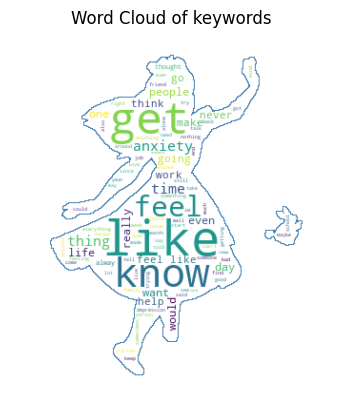

<Figure size 640x480 with 0 Axes>

In [126]:
## Result analysis
# 1. show the word cloud
# 1) read the mask image
mask_picture = np.array(Image.open(os.path.join(os.getcwd(), "people.png"))) # os.getcwd(): get current directory
# 2) create an instance of the WordCloud
wc = WordCloud(background_color="white", max_words=2000, mask=mask_picture, 
               width=800, height=600, stopwords=stop_words, 
               contour_width=1, contour_color='steelblue')
# 3) concat all tokens into a string
wc_text = ' '.join(overall_tokens)
# 4) generate the word cloud
wc.generate(wc_text)
# 5) save to a file
wc.to_file(os.path.join(os.getcwd(), "word_cloud.png"))
# 6) show the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud of keywords")
plt.axis("off")
plt.figure()
plt.show()

In [127]:
# 2. create a heatmap
# 1) use keywords that appear in the Data Collection Part
depression_keywords = ["depression", "depressed", "hopeless", "hopelessness", "sadness", "sad", "helpless", "helplessness", "disappoint", "disappointed", "disappointment"]
# 2) copy the main_dataset
analyse_main_dataset = nltk_main_dataset.copy()
analyse_main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment,pred_label,pred_sentiment
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630,1.0,-0.9340
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571,1.0,-0.9563
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850,1.0,-0.8680
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000,1.0,-0.8661
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375,1.0,-0.9044
...,...,...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000,0.0,0.5584
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000,0.0,0.4754
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000,1.0,-0.9666
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000,1.0,-0.7781


In [128]:
# 3) check info
analyse_main_dataset.info()
analyse_main_dataset['pred_label'] = analyse_main_dataset['pred_label'].astype(int)
# 4) extract year, month and day
analyse_main_dataset['year'] = analyse_main_dataset['date'].dt.year
analyse_main_dataset['month'] = analyse_main_dataset['date'].dt.month
analyse_main_dataset['day'] = analyse_main_dataset['date'].dt.day
analyse_main_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1377 non-null   object        
 1   subreddit       1377 non-null   object        
 2   post_id         1377 non-null   object        
 3   text            1377 non-null   object        
 4   label           1377 non-null   int64         
 5   confidence      1377 non-null   float64       
 6   created_utc     1377 non-null   float64       
 7   date            1377 non-null   datetime64[ns]
 8   sentiment       1377 non-null   float64       
 9   pred_label      1377 non-null   float64       
 10  pred_sentiment  1377 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 118.5+ KB


,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment,pred_label,pred_sentiment,year,month,day
0,33053,anxiety,5m3k80,It cleared up and I was okay but. On Monday ...,1,0.800000,1.483582e+09,2017-01-05 02:09:34,-0.079630,1,-0.9340,2017,1,5
1,1156,anxiety,8sxdmy,Next week I’ll be flying for our family vacati...,1,0.571429,1.529631e+09,2018-06-22 01:27:34,0.008571,1,-0.9563,2018,6,22
2,1929,anxiety,87l3pf,Everything sets me off and I'm almost having a...,1,1.000000,1.522177e+09,2018-03-27 19:02:26,0.016850,1,-0.8680,2018,3,27
3,48347,anxiety,910inu,I’ve been taking 12.5 mgs zoloft for about 6 m...,1,1.000000,1.532289e+09,2018-07-22 19:56:23,0.055000,1,-0.8661,2018,7,22
4,15182,anxiety,9wypos,These past couple of months have been the wors...,1,1.000000,1.542189e+09,2018-11-14 09:49:16,-0.534375,1,-0.9044,2018,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,mlf079d,depression,mlf079d,"Yeah, I think that most leave, maybe except fo...",-1,0.823458,1.743791e+09,2025-04-04 18:27:35,0.000000,0,0.5584,2025,4,4
1373,mlgvhfk,depression,mlgvhfk,So true.,-1,0.823458,1.743814e+09,2025-04-05 00:44:40,0.000000,0,0.4754,2025,4,5
1374,mli65r5,depression,mli65r5,It’s not possible to get away from trauma when...,-1,0.823458,1.743836e+09,2025-04-05 06:45:28,0.000000,1,-0.9666,2025,4,5
1375,mlgzd36,depression,mlgzd36,Very interesting! I do feel as though even tho...,-1,0.823458,1.743815e+09,2025-04-05 01:09:54,0.000000,1,-0.7781,2025,4,5


In [129]:
analyse_main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1377 non-null   object        
 1   subreddit       1377 non-null   object        
 2   post_id         1377 non-null   object        
 3   text            1377 non-null   object        
 4   label           1377 non-null   int64         
 5   confidence      1377 non-null   float64       
 6   created_utc     1377 non-null   float64       
 7   date            1377 non-null   datetime64[ns]
 8   sentiment       1377 non-null   float64       
 9   pred_label      1377 non-null   int64         
 10  pred_sentiment  1377 non-null   float64       
 11  year            1377 non-null   int32         
 12  month           1377 non-null   int32         
 13  day             1377 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), ob

In [130]:
# 5) construct a dataframe to draw the heatmap
# select rows mentioning depression-related keywords
#   case=False: case insensitive
#   na=False: not fill missing values
mention_main_dataset = analyse_main_dataset[analyse_main_dataset['text'].str.contains('|'.join(depression_keywords), case=False, na=False)]
mention_main_dataset

,id,subreddit,post_id,text,label,confidence,created_utc,date,sentiment,pred_label,pred_sentiment,year,month,day
27,25,anxiety,673i4a,Im 13 years old and except for school i never ...,1,0.571429,1.492969e+09,2017-04-23 17:33:54,-0.002778,1,-0.5751,2017,4,23
39,638,anxiety,7scfbe,I’ve always been the type of person who’s been...,0,1.000000,1.516688e+09,2018-01-23 06:05:51,0.173864,1,-0.5499,2018,1,23
46,12959,anxiety,7i3qui,"Sometimes, when I finally got out of bed and s...",0,0.800000,1.512619e+09,2017-12-07 03:48:40,-0.042020,1,-0.4569,2017,12,7
47,1268,anxiety,91nveu,"I am currently only using 5-htp once a week, i...",1,1.000000,1.532486e+09,2018-07-25 02:28:19,0.115675,1,-0.1571,2018,7,25
52,39170,anxiety,8bgr3a,When I was living with people I would stand be...,1,0.800000,1.523451e+09,2018-04-11 12:42:43,-0.050000,1,-0.6693,2018,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,mlfd8r1,depression,mlfd8r1,"fav quite from Rocky ""Its not how hard you hit...",-1,0.823458,1.743795e+09,2025-04-04 19:34:57,0.000000,0,0.8589,2025,4,4
1335,mlhpv80,depression,mlhpv80,Yeah youre right I feel immense guilt sadly. I...,-1,0.823458,1.743827e+09,2025-04-05 04:18:56,0.000000,0,0.2003,2025,4,5
1337,mlgvw90,depression,mlgvw90,I have autism and adhd sadly as well as social...,-1,0.823458,1.743814e+09,2025-04-05 00:47:18,0.000000,1,-0.3400,2025,4,5
1357,mlfiypq,depression,mlfiypq,I feel the EXACT same way. It started off feel...,-1,0.823458,1.743797e+09,2025-04-04 20:04:23,0.000000,0,0.5739,2025,4,4


- [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html#pandas.core.groupby.DataFrameGroupBy.mean)
- [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)
- [pivot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot)
- [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)
- [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

In [131]:
# use groupby() to group by year and month
heatmap_data = mention_main_dataset.groupby(['year', 'month']).size()
heatmap_data = heatmap_data.reset_index(name='num_keywords')
heatmap_data

,year,month,num_keywords
0,2013,2,8
1,2013,3,3
2,2013,8,2
3,2013,10,1
4,2015,1,1
5,2015,2,1
6,2015,3,3
7,2015,4,1
8,2015,5,2
9,2015,6,6


In [132]:
# sort the dataframe
sorted_heatmap_data = heatmap_data.sort_values(by=['year', 'month'], ascending=True)
sorted_heatmap_data

,year,month,num_keywords
0,2013,2,8
1,2013,3,3
2,2013,8,2
3,2013,10,1
4,2015,1,1
5,2015,2,1
6,2015,3,3
7,2015,4,1
8,2015,5,2
9,2015,6,6


In [133]:
# reshape the dataframe
sorted_heatmap_data = sorted_heatmap_data.pivot(index='year', columns='month', values='num_keywords')
sorted_heatmap_data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,8.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN
2015,1.0,1.0,3.0,1.0,2.0,6.0,1.0,2.0,7.0,6.0,4.0,2.0
2016,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,1.0,3.0,NaN,5.0
2017,15.0,5.0,10.0,7.0,5.0,7.0,10.0,10.0,7.0,4.0,3.0,11.0
2018,59.0,9.0,12.0,14.0,8.0,14.0,16.0,18.0,17.0,15.0,10.0,NaN
2019,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN,NaN
2020,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
2021,NaN,NaN,4.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2025,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# replace all NaN with 0
sorted_heatmap_data = sorted_heatmap_data.fillna(0)
sorted_heatmap_data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,0.0,8.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
2015,1.0,1.0,3.0,1.0,2.0,6.0,1.0,2.0,7.0,6.0,4.0,2.0
2016,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,3.0,0.0,5.0
2017,15.0,5.0,10.0,7.0,5.0,7.0,10.0,10.0,7.0,4.0,3.0,11.0
2018,59.0,9.0,12.0,14.0,8.0,14.0,16.0,18.0,17.0,15.0,10.0,0.0
2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2020,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
2021,0.0,0.0,4.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2025,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


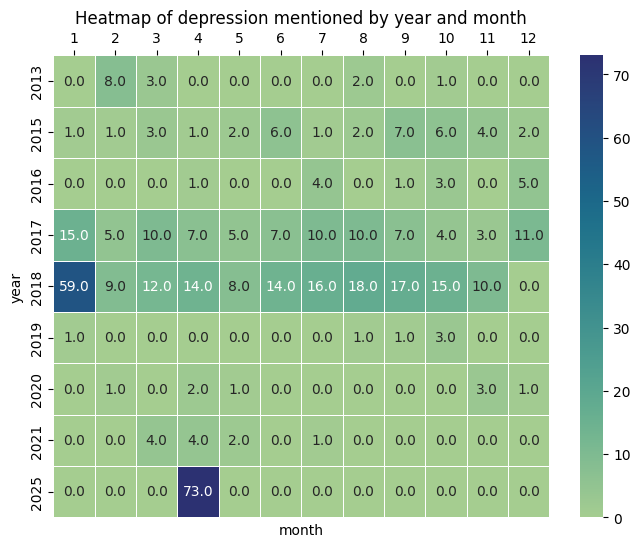

In [135]:
# draw the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(data=sorted_heatmap_data, annot=True, fmt=".1f", linewidth=.5, cbar=True, cmap="crest")
ax.set(xlabel="month", ylabel="year")
ax.xaxis.tick_top()
# set title and save
plt.title("Heatmap of depression mentioned by year and month")
plt.savefig('heatmap.png', dpi=300)

In [136]:
# 3. correlation analysis
# 1) use groupby() to group by year
num_keywords_data = mention_main_dataset.groupby(['year']).size()
num_keywords_data = num_keywords_data.reset_index(name='num_keywords')
num_keywords_data

,year,num_keywords
0,2013,14
1,2015,36
2,2016,14
3,2017,94
4,2018,192
5,2019,6
6,2020,8
7,2021,11
8,2025,73


In [137]:
# 2) compute the global average annual prevalence of depression from the global mental health dataset
average_prevalence_depression = global_dataset.groupby('year')[['schizophrenia_disorders_rate', 'bipolar_disorders_rate', 
                                                                'eating_disorders_rate', 'anxiety_disorders_rate', 
                                                                'drug_disorders_rate', 'depression_disorders_rate', 
                                                                'alcohol_disorders_rate']].mean()
average_prevalence_depression = average_prevalence_depression.reset_index(names="year")
average_prevalence_depression

,year,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
0,1990,0.209548,0.715392,0.221774,3.957269,0.808283,3.506288,1.546533
1,1991,0.209586,0.715740,0.222076,3.960009,0.813466,3.510948,1.553500
2,1992,0.209634,0.716091,0.222481,3.962778,0.818692,3.515033,1.559927
3,1993,0.209690,0.716430,0.223033,3.965405,0.823780,3.518531,1.565611
4,1994,0.209751,0.716755,0.223710,3.967976,0.828389,3.521437,1.570127
5,1995,0.209810,0.717037,0.224514,3.970051,0.832391,3.523328,1.573532
6,1996,0.209877,0.717293,0.225581,3.972869,0.837124,3.524659,1.576549
7,1997,0.209966,0.717564,0.226980,3.977437,0.843217,3.525602,1.579598
8,1998,0.210075,0.717843,0.228581,3.982739,0.849664,3.525968,1.582334
9,1999,0.210200,0.718117,0.230264,3.987662,0.855211,3.525664,1.584450


In [138]:
# 3) integrate two dataframes into one dataframe
regression_data = pd.merge(num_keywords_data, average_prevalence_depression, on='year', how='outer')
regression_data

,year,num_keywords,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
0,1990,NaN,0.209548,0.715392,0.221774,3.957269,0.808283,3.506288,1.546533
1,1991,NaN,0.209586,0.715740,0.222076,3.960009,0.813466,3.510948,1.553500
2,1992,NaN,0.209634,0.716091,0.222481,3.962778,0.818692,3.515033,1.559927
3,1993,NaN,0.209690,0.716430,0.223033,3.965405,0.823780,3.518531,1.565611
4,1994,NaN,0.209751,0.716755,0.223710,3.967976,0.828389,3.521437,1.570127
5,1995,NaN,0.209810,0.717037,0.224514,3.970051,0.832391,3.523328,1.573532
6,1996,NaN,0.209877,0.717293,0.225581,3.972869,0.837124,3.524659,1.576549
7,1997,NaN,0.209966,0.717564,0.226980,3.977437,0.843217,3.525602,1.579598
8,1998,NaN,0.210075,0.717843,0.228581,3.982739,0.849664,3.525968,1.582334
9,1999,NaN,0.210200,0.718117,0.230264,3.987662,0.855211,3.525664,1.584450


In [139]:
# 4) consider rows without missing values
# here, I don't reset indices, because it can help find the corresponding year
handled_regression_data = regression_data.dropna()
handled_regression_data = handled_regression_data[['num_keywords', 'schizophrenia_disorders_rate', 'bipolar_disorders_rate',
                                   'eating_disorders_rate', 'anxiety_disorders_rate', 'drug_disorders_rate', 
                                   'depression_disorders_rate', 'alcohol_disorders_rate']]
handled_regression_data

,num_keywords,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
23,14.0,0.213900,0.721604,0.257151,4.004003,0.891820,3.459763,1.607668
25,36.0,0.214310,0.722138,0.260198,4.003509,0.897623,3.456916,1.601098
26,14.0,0.214511,0.722409,0.261535,4.002900,0.900660,3.456299,1.596272
27,94.0,0.214705,0.722693,0.262806,4.002347,0.903575,3.456795,1.590201


In [140]:
# 5) calculate the correlation
correlation = handled_regression_data.corr(numeric_only=True)
correlation

,num_keywords,schizophrenia_disorders_rate,bipolar_disorders_rate,eating_disorders_rate,anxiety_disorders_rate,drug_disorders_rate,depression_disorders_rate,alcohol_disorders_rate
num_keywords,1.000000,0.687847,0.703226,0.675158,-0.739638,0.693156,-0.356597,-0.761096
schizophrenia_disorders_rate,0.687847,1.000000,0.999658,0.999444,-0.973251,0.999851,-0.886215,-0.986517
bipolar_disorders_rate,0.703226,0.999658,1.000000,0.998310,-0.978100,0.999901,-0.873872,-0.990377
eating_disorders_rate,0.675158,0.999444,0.998310,1.000000,-0.965085,0.998721,-0.900396,-0.980659
anxiety_disorders_rate,-0.739638,-0.973251,-0.978100,-0.965085,1.000000,-0.977072,0.765202,0.995657
drug_disorders_rate,0.693156,0.999851,0.999901,0.998721,-0.977072,1.000000,-0.878732,-0.989050
depression_disorders_rate,-0.356597,-0.886215,-0.873872,-0.900396,0.765202,-0.878732,1.000000,0.798711
alcohol_disorders_rate,-0.761096,-0.986517,-0.990377,-0.980659,0.995657,-0.989050,0.798711,1.000000


**Analysis**:
- Each variable and itself have a perfect positive linear correlation.
- Variables `num_keywords` and `depression_disorders_rate` have a correlation coefficient of -0.356597. This means that **there is a moderate negative correlation** between these two variables. **As the number of keywords mentioned in the social media platforms increases, the rate of depression will decrease.**
- Variables `num_keywords` and `anxiety_disorders_rate` have a correlation coefficient of -0.739638. Variables `num_keywords` and `alcohol_disorders_rate` have a correlation coefficient of -0.761096. These mean that **there are strong negative correlations** between these pairs of two variables.
- Variables `num_keywords` and `schizophrenia_disorders_rate` have a correlation coefficient of 0.687847. Variables `num_keywords` and `bipolar_disorders_rate	` have a correlation coefficient of 0.703226. Variables `num_keywords` and `eating_disorders_rate` have a correlation coefficient of 0.675158. Variables `num_keywords` and `drug_disorders_rate` have a correlation coefficient of 0.693156. These mean that **there are strong positive correlations** between these pairs of two variables, respectively.

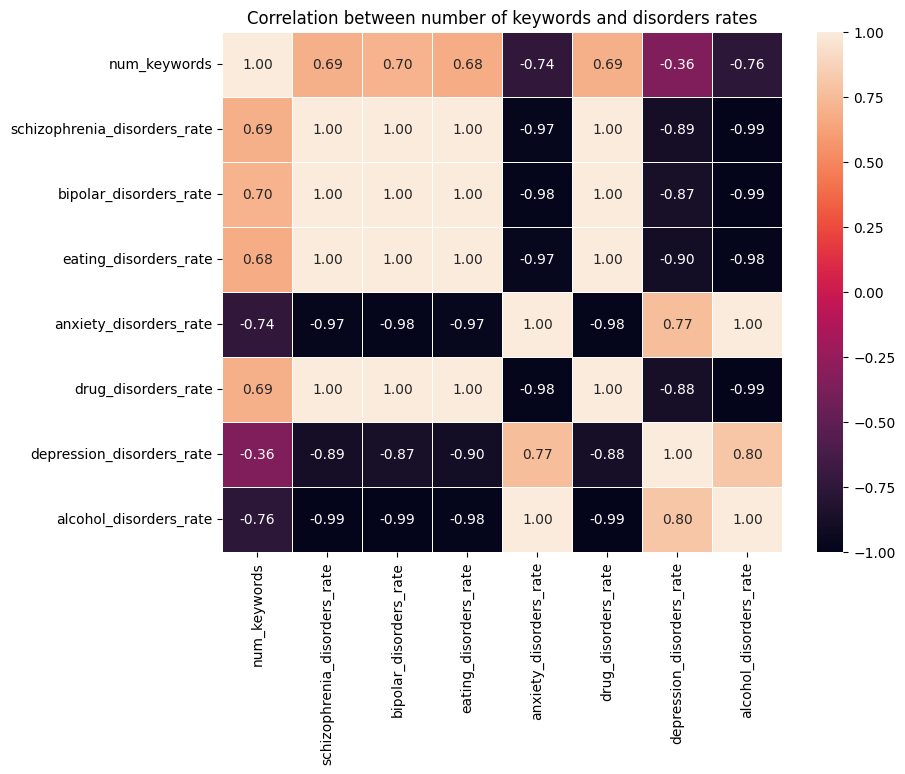

In [141]:
# 6) create the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True, fmt=".2f", linewidth=.5, cbar=True, vmin=-1.0, vmax=1.0)
plt.title("Correlation between number of keywords and disorders rates")
plt.subplots_adjust(top=0.95, bottom=0.3, left=0.25, right=0.95, hspace=0.1, wspace=0.1)
plt.savefig('correlation.png', dpi=300)

In [142]:
# 7) calculate the pearson correlation and p-value
pearson_coef, p_value = stats.pearsonr(handled_regression_data['num_keywords'], 
                                       handled_regression_data['depression_disorders_rate'])
print(f"The Pearson Correlation Coefficient is: {pearson_coef} with a p-value of P = {p_value}")

The Pearson Correlation Coefficient is: -0.35659730887758545 with a p-value of P = 0.6434026911224144


In [143]:
# 4. draw a line chart
# 1) select data
line_data = regression_data[['year', 'num_keywords', 'depression_disorders_rate']].copy()
line_data

,year,num_keywords,depression_disorders_rate
0,1990,NaN,3.506288
1,1991,NaN,3.510948
2,1992,NaN,3.515033
3,1993,NaN,3.518531
4,1994,NaN,3.521437
5,1995,NaN,3.523328
6,1996,NaN,3.524659
7,1997,NaN,3.525602
8,1998,NaN,3.525968
9,1999,NaN,3.525664


In [144]:
# 2) imputate the missing values
line_data = line_data.fillna(0)
line_data

,year,num_keywords,depression_disorders_rate
0,1990,0.0,3.506288
1,1991,0.0,3.510948
2,1992,0.0,3.515033
3,1993,0.0,3.518531
4,1994,0.0,3.521437
5,1995,0.0,3.523328
6,1996,0.0,3.524659
7,1997,0.0,3.525602
8,1998,0.0,3.525968
9,1999,0.0,3.525664


- [plt](https://matplotlib.org/stable/api/pyplot_summary.html)
- [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
- [legend](https://matplotlib.org/stable/api/legend_api.html#module-matplotlib.legend)

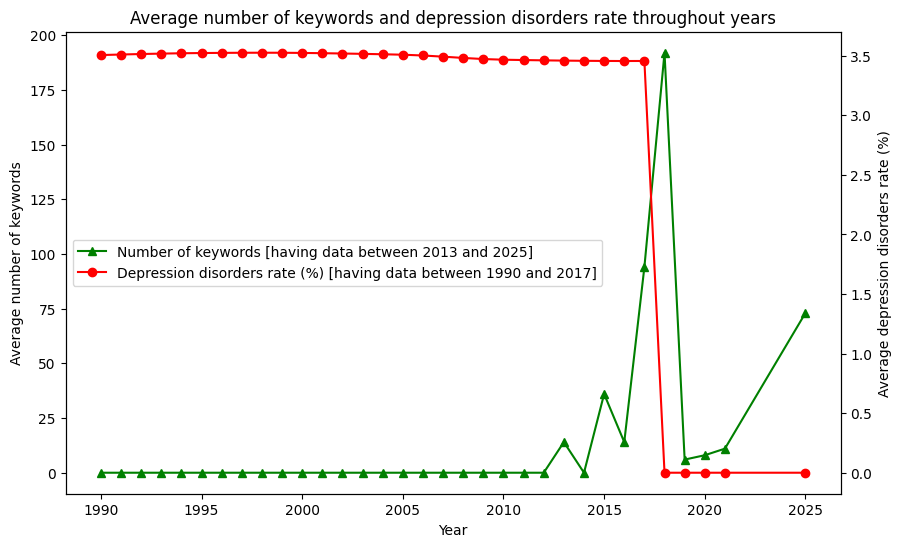

In [145]:
# 3) draw the chart (left axis)
plt.figure(figsize=(10, 6))
line1 = plt.plot(line_data['year'], line_data['num_keywords'], 'g^-', label='Number of keywords [having data between 2013 and 2025]') # return a list
plt.xlabel('Year')
plt.ylabel('Average number of keywords')
# 4) draw the chart (right axis)
ax2 = plt.twinx() # share the first axis
line2 = ax2.plot(line_data['year'], line_data['depression_disorders_rate'], 'ro-', label='Depression disorders rate (%) [having data between 1990 and 2017]') # return a list
ax2.set_ylabel('Average depression disorders rate (%)')
# 5) other settings of the line chart
plt.title("Average number of keywords and depression disorders rate throughout years")
lines = [line1[0], line2[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='center left', frameon=True)
# 6) save the line chart
plt.savefig('line_chart.png', dpi=300)

In [146]:
## save the data
nltk_main_dataset.to_csv('nltk-main-dataset.csv', index=False)